<span style="color:darkblue; font-size:30px; font-weight:bold; text-decoration:underline;">Packages Required</span>

In [1]:
# General Packages
import pandas as pd
import numpy as np

# Data Collection
import requests
from io import BytesIO

# Visualization
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 15})
import plotly.express as px

# Text Pre-processing
from nltk import pos_tag # Part-of-Speech (POS) tagging
from nltk.stem import WordNetLemmatizer # lemmatize a word
from nltk.stem.porter import PorterStemmer # Information Retrieval
from nltk.tokenize import word_tokenize # splits sentence into words 
from nltk.tokenize import WhitespaceTokenizer # splits on and discards only whitespace characters
from nltk.corpus import wordnet # large lexical database of English words
from nltk.sentiment.vader import SentimentIntensityAnalyzer # sentiment analyzer
#from nltk.corpus import stopwords, wordnet, words
import string
import nltk
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from collections import Counter

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("punkt")
nltk.download('vader_lexicon')
nltk.download("tokenizers/punkt", "punkt"),
nltk.download("tokenizers/punkt_tab", "punkt_tab")  # NLTK 3.8+
nltk.download("taggers/averaged_perceptron_tagger", "averaged_perceptron_tagger")
nltk.download("taggers/averaged_perceptron_tagger_eng", "averaged_perceptron_tagger_eng")  # NLTK 3.8+
nltk.download("corpora/wordnet", "wordnet")
nltk.download("corpora/omw-1.4", "omw-1.4")

#nltk.download('words')

# Modelling
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import pyLDAvis
import pyLDAvis.lda_model
from imblearn.over_sampling import RandomOverSampler


import re
import unicodedata
import pandas as pd
from langdetect import detect, DetectorFactory, LangDetectException

import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import contractions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import gradio as gr
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_d

In [2]:
import nltk
from contextlib import suppress

def ensure_nltk_quiet():
    """
    Ensure required NLTK datasets exist, using correct *package IDs* (not paths).
    Works across NLTK versions; avoids noisy 'not found in index' messages.
    """
    # Map package IDs to the data-paths we check
    CHECK_PATH = {
        "punkt": "tokenizers/punkt",
        "averaged_perceptron_tagger": "taggers/averaged_perceptron_tagger",
        "wordnet": "corpora/wordnet",
        "omw-1.4": "corpora/omw-1.4",
        # These two are present only in newer NLTK (3.8+); we'll attempt but ignore if unknown
        "punkt_tab": "tokenizers/punkt_tab",
        "averaged_perceptron_tagger_eng": "taggers/averaged_perceptron_tagger_eng",
    }

    # Try standard packages first; extras are best-effort
    primary = ["punkt", "averaged_perceptron_tagger", "wordnet", "omw-1.4"]
    optional = ["punkt_tab", "averaged_perceptron_tagger_eng"]

    for pkg in primary + optional:
        path = CHECK_PATH[pkg]
        try:
            nltk.data.find(path)  # already available
            continue
        except LookupError:
            # Try to download this *package id*, not the path
            # quiet=True minimizes logging, raise_on_error=False prevents exceptions
            success = nltk.download(pkg, quiet=True, raise_on_error=False)
            if not success:
                # If we're offline or the package is unknown for this NLTK, just ignore.
                pass

# Call once at startup
ensure_nltk_quiet()


<span style="color:darkblue; font-size:30px; font-weight:bold; text-decoration:underline;">3: Data Understanding and Preparation</span>

<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>3.3.1: Data Cleaning of Structured Data</span>

In [3]:
# ======================================================================== #
# Read CSV
# ======================================================================== #
hotels = pd.read_csv('hotels.csv')
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel_name            19996 non-null  object 
 1   country               19996 non-null  object 
 2   username              19996 non-null  object 
 3   user_country          19990 non-null  object 
 4   room_view             19704 non-null  object 
 5   stay_duration         19996 non-null  object 
 6   stay_type             19996 non-null  object 
 7   review_post_date      19996 non-null  object 
 8   review_title          19986 non-null  object 
 9   rating                19996 non-null  float64
 10  original_lang         19996 non-null  object 
 11  review_text_liked     10910 non-null  object 
 12  review_text_disliked  7495 non-null   object 
 13  full_review           19996 non-null  object 
 14  en_full_review        19996 non-null  object 
 15  found_helpful      

<span style='color:white; font-size:20px; font-weight:bold;'>3.3: Data Preparation</span>

<span style='color:white; font-size:15px; font-weight:bold;'>3.3.1: Data Cleaning</span>

In [4]:
# ======================================================================== #
# Remove duplicates
# ======================================================================== #
num_duplicates = hotels.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
hotels = hotels.drop_duplicates()
hotels = hotels.reset_index(drop=True)

Number of duplicate rows: 17


In [5]:
# ======================================================================== #
# Keep relevant columns
# ======================================================================== #
hotels.columns.tolist()
columns_to_keep = [
    'hotel_name', 'user_country', 'stay_duration', 'stay_type',
    'review_post_date', 'review_title', 'rating',
    'review_text_liked', 'review_text_disliked'
]
hotels = hotels[columns_to_keep]
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel_name            19979 non-null  object 
 1   user_country          19973 non-null  object 
 2   stay_duration         19979 non-null  object 
 3   stay_type             19979 non-null  object 
 4   review_post_date      19979 non-null  object 
 5   review_title          19969 non-null  object 
 6   rating                19979 non-null  float64
 7   review_text_liked     10910 non-null  object 
 8   review_text_disliked  7495 non-null   object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [6]:
# ======================================================================== #
# Concatenate title, positive and negative review into a full review
# ======================================================================== #
hotels["full_review"] = hotels["review_title"].fillna('') + " " + \
                    hotels["review_text_liked"].fillna('') + " " + \
                    hotels["review_text_disliked"].fillna('')
columns_to_remove = ['review_title', 'review_text_liked', 'review_text_disliked']
hotels = hotels.drop(columns=columns_to_remove)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hotel_name        19979 non-null  object 
 1   user_country      19973 non-null  object 
 2   stay_duration     19979 non-null  object 
 3   stay_type         19979 non-null  object 
 4   review_post_date  19979 non-null  object 
 5   rating            19979 non-null  float64
 6   full_review       19979 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


In [7]:
# ======================================================================== #
# Discretise rating
# ======================================================================== #
def categorize_rating(r):
    if r >= 7:
        return 'Positive'
    elif r <= 4:
        return 'Negative'
    else:
        return 'Neutral'

hotels['rating_des'] = hotels['rating'].apply(categorize_rating)

In [8]:
# ======================================================================== #
# Handle missing values
# ======================================================================== #
hotels = hotels[hotels['user_country'].notna() & 
                (hotels['user_country'].str.strip() != "")]
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19973 entries, 0 to 19978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hotel_name        19973 non-null  object 
 1   user_country      19973 non-null  object 
 2   stay_duration     19973 non-null  object 
 3   stay_type         19973 non-null  object 
 4   review_post_date  19973 non-null  object 
 5   rating            19973 non-null  float64
 6   full_review       19973 non-null  object 
 7   rating_des        19973 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.4+ MB


In [9]:
# ======================================================================== #
# Reformat date
# ======================================================================== #
hotels["review_post_date"] = pd.to_datetime(hotels["review_post_date"], errors='coerce')
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19973 entries, 0 to 19978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   hotel_name        19973 non-null  object        
 1   user_country      19973 non-null  object        
 2   stay_duration     19973 non-null  object        
 3   stay_type         19973 non-null  object        
 4   review_post_date  19973 non-null  datetime64[ns]
 5   rating            19973 non-null  float64       
 6   full_review       19973 non-null  object        
 7   rating_des        19973 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.4+ MB


<span style='color:white; font-size:20px; font-weight:bold;'>3.2: Exploratory Data Analysis</span>

<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>3.4: Exploratory Data Analysis (EDA)</span>

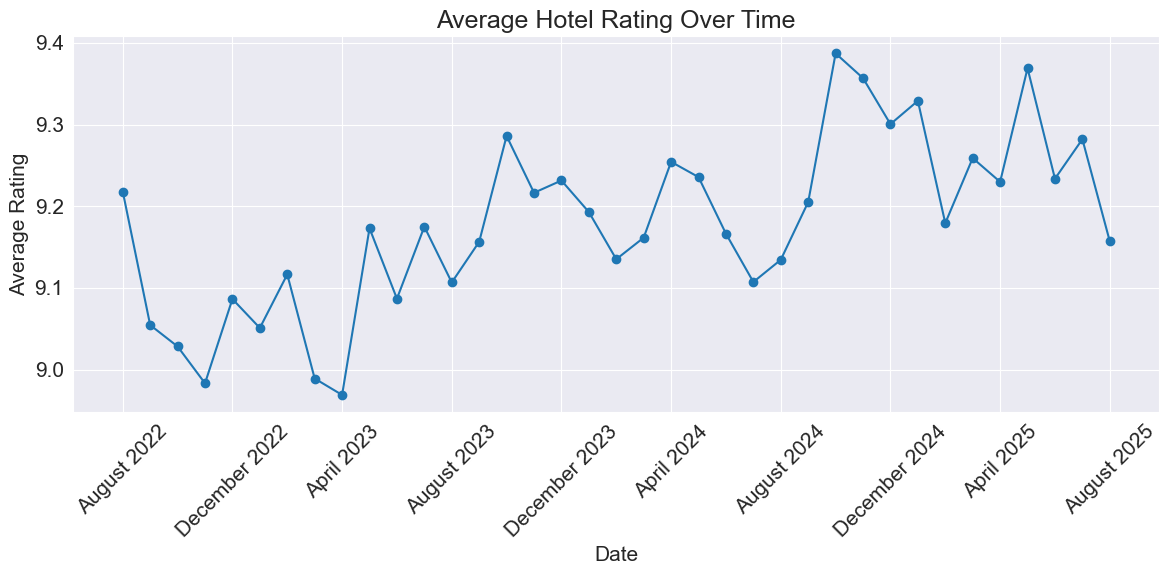

In [10]:
# ======================================================================== #
# Average hotel rating over time
# ======================================================================== #

# Average rating over time
hotels["review_post_date"] = pd.to_datetime(hotels["review_post_date"], errors='coerce')
hotels["year_month"] = hotels["review_post_date"].dt.to_period("M").astype(str)
monthly_avg = hotels.groupby("year_month")["rating"].mean().reset_index()
monthly_avg["year_month_dt"] = pd.to_datetime(monthly_avg["year_month"])
monthly_avg["month_year_str"] = monthly_avg["year_month_dt"].dt.strftime("%B %Y")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg["month_year_str"], monthly_avg["rating"], marker='o', linestyle='-')
xticks = monthly_avg["month_year_str"][::4]
plt.xticks(ticks=xticks.index, labels=xticks, rotation=45)
plt.title("Average Hotel Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

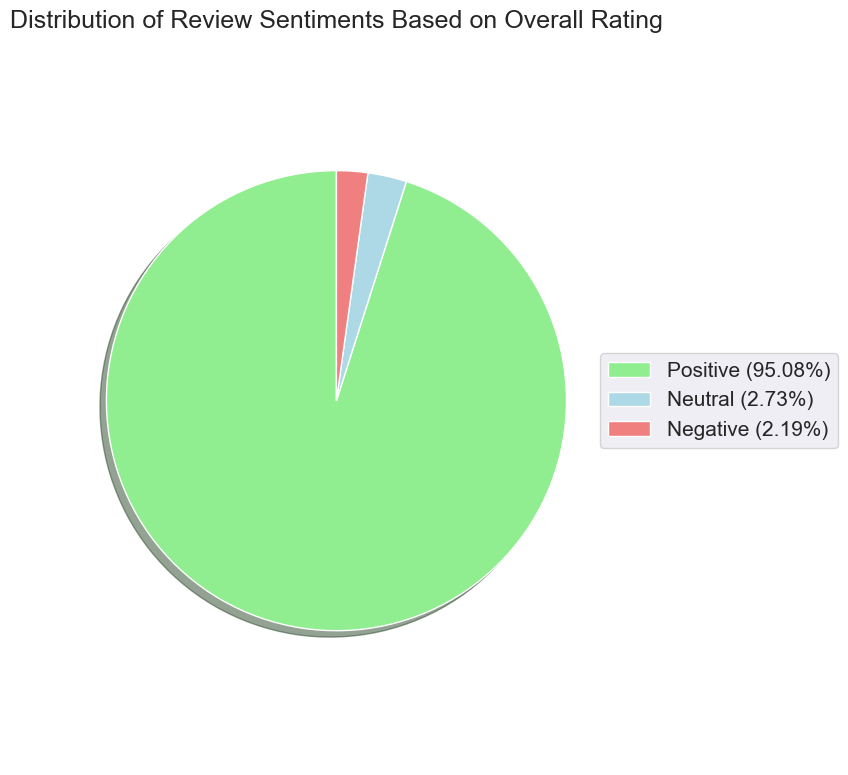

In [11]:
# ======================================================================== #
# Distribution of review sentiments vs rating
# ======================================================================== #
rating_counts = hotels['rating_des'].value_counts()
labels = ['Positive', 'Neutral', 'Negative']
values = [rating_counts.get(label, 0) for label in labels]
colors = ['lightgreen', 'lightblue', 'lightcoral']

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts = ax.pie(values,
                       labels=None,
                       colors=colors,
                       shadow=True,
                       startangle=90)

percentages = [f"{label} ({val / sum(values) * 100:.2f}%)"
               for label, val in zip(labels, values)]

ax.legend(wedges,
          percentages,
          loc="center left",
          bbox_to_anchor=(1, 0.5))

ax.axis('equal')
plt.title('Distribution of Review Sentiments Based on Overall Rating', loc='center')
plt.tight_layout()
plt.show()

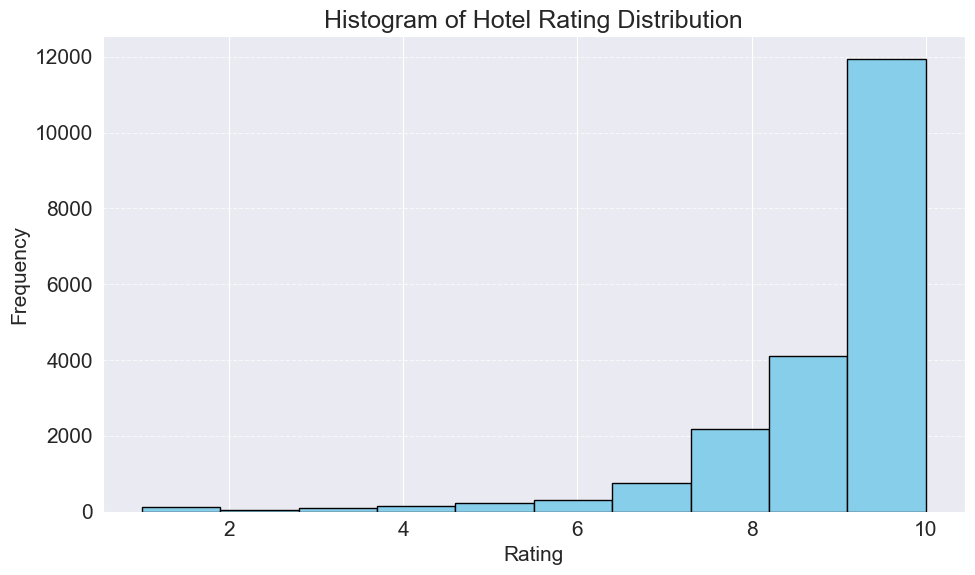

In [12]:
# ======================================================================== #
# Distribution of hotel rating
# ======================================================================== #
plt.figure(figsize=(10,6))
plt.hist(hotels['rating'], bins=10, edgecolor='black', color='skyblue')
plt.title("Histogram of Hotel Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# ======================================================================== #
# Coutry of residence distribution
# ======================================================================== #
print("For the top 15 hotels in Singapore, the reviewers came from {} different countries.".format(hotels.user_country.nunique()))
print("\n")

# Top 10 localities
top10_df = hotels.groupby('user_country').size().reset_index().sort_values(0, ascending=False).head(10)
top10_df.columns = ['Country', 'Counts']
print("Top 10 countried ranked by review counts")
top10_df

For the top 15 hotels in Singapore, the reviewers came from 168 different countries.


Top 10 countried ranked by review counts


,Country,Counts
10,Australia,4127
159,United Kingdom,3323
160,United States,2460
138,Singapore,1072
158,United Arab Emirates,517
112,New Zealand,503
69,India,452
95,Malaysia,443
56,Germany,375
147,Switzerland,338


In [14]:
# ======================================================================== #
# Top 15 hotels distribution
# ======================================================================== #
exact_mapping = {
    "raffles": "Raffles",
    "the-barracks-by-far-east-hospitality": "The Barracks Hotel Sentosa",
    "the-fullerton-bay-singapore": "The Fullerton Bay Hotel",
    "capella-singapore": "Capella",
    "marina-bay-sands": "Marina Bay Sands",
    "hotel-mandarin-oriental": "Mandarin Oriental",
    "fraser-residence-river-promenade-singapore": "Fraser Residence River Promenade",
    "four-season-singapore": "Four Seasons Hotel",
    "heritage-collection-on-victoria": "Heritage Collection on Victoria",
    "the-fullerton-singapore": "The Fullerton Hotel",
    "fraser-residence-orchard-singapore-singapore": "Fraser Residence Orchard",
    "the-ritz-carlton-millenia-singapore": "The Ritz-Carlton",
    "heritage-collection-on-pagoda": "Heritage Collection on Pagoda",
    "cube-boutique-capsule-at-boat-quay": "Cube Social Boutique Capsule Hotel",
    "parkroyal-on-pickering": "PARKROYAL COLLECTION Pickering"
}

ranking = [
    "Raffles",
    "The Barracks Hotel Sentosa",
    "The Fullerton Bay Hotel",
    "Capella",
    "Marina Bay Sands",
    "Mandarin Oriental",
    "Fraser Residence River Promenade",
    "Four Seasons Hotel",
    "Heritage Collection on Victoria",
    "The Fullerton Hotel",
    "Fraser Residence Orchard",
    "The Ritz-Carlton",
    "Heritage Collection on Pagoda",
    "Cube Social Boutique Capsule Hotel",
    "PARKROYAL COLLECTION Pickering",
]

ranking_dict = {name.lower(): rank for rank, name in enumerate(ranking, start=1)}

hotels["hotel_name_cleaned"] = hotels["hotel_name"].str.lower().map(exact_mapping)

def get_rank(hotel):
    for ref_name, rank in ranking_dict.items():
        if ref_name in hotel.lower():
            return rank
    return None

hotels["hotel_rank_booking.com"] = hotels["hotel_name_cleaned"].apply(lambda x: ranking_dict.get(x.lower()) if pd.notna(x) else None)
hotels.drop(columns=["hotel_name"], inplace=True)

# Reorder
cols = hotels.columns.tolist()
rank_col = cols.pop(cols.index("hotel_rank_booking.com"))
name_cleaned_col = cols.pop(cols.index("hotel_name_cleaned"))
cols = [name_cleaned_col, rank_col] + cols
hotels = hotels[cols]

# Top 10 localities
top15_df = hotels.groupby('hotel_name_cleaned').size().reset_index().sort_values(0, ascending=False).head(15)
top15_df.columns = ['Hotel', 'Counts']
print("Number of reviews per luxury hotel from most to least review count")
top15_df

Number of reviews per luxury hotel from most to least review count


,Hotel,Counts
8,Marina Bay Sands,9040
9,PARKROYAL COLLECTION Pickering,3258
13,The Fullerton Hotel,2392
14,The Ritz-Carlton,1204
2,Four Seasons Hotel,940
5,Heritage Collection on Pagoda,613
1,Cube Social Boutique Capsule Hotel,405
12,The Fullerton Bay Hotel,401
3,Fraser Residence Orchard,381
4,Fraser Residence River Promenade,332


In [15]:
# ======================================================================== #
# Top 15 hotels distribution
# ======================================================================== #
top15_df = hotels.groupby('hotel_name_cleaned').size().reset_index().sort_values(0, ascending=False).head(15)
top15_df.columns = ['Hotel', 'Counts']
print("Number of reviews per luxury hotel from most to least review count")
top15_df

Number of reviews per luxury hotel from most to least review count


,Hotel,Counts
8,Marina Bay Sands,9040
9,PARKROYAL COLLECTION Pickering,3258
13,The Fullerton Hotel,2392
14,The Ritz-Carlton,1204
2,Four Seasons Hotel,940
5,Heritage Collection on Pagoda,613
1,Cube Social Boutique Capsule Hotel,405
12,The Fullerton Bay Hotel,401
3,Fraser Residence Orchard,381
4,Fraser Residence River Promenade,332


In [16]:
# ======================================================================== #
# Review count by country of residence
# ======================================================================== #
country_counts = hotels['user_country'].value_counts().reset_index()
country_counts.columns = ['country', 'review_count']

fig = px.choropleth(country_counts,
                    locations="country",
                    locationmode="country names",
                    color="review_count",
                    hover_name="country",
                    color_continuous_scale="Purples",
                    title="Review Count by User Country")

fig.show()

C:\Users\rebec\AppData\Local\Temp\ipykernel_20664\3749036663.py:7: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(country_counts,
C:\Users\rebec\AppData\Roaming\Python\Python311\site-packages\plotly\express\_core.py:2767: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\rebec\AppData\Local\Temp\ipykernel_20664\1434137207.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




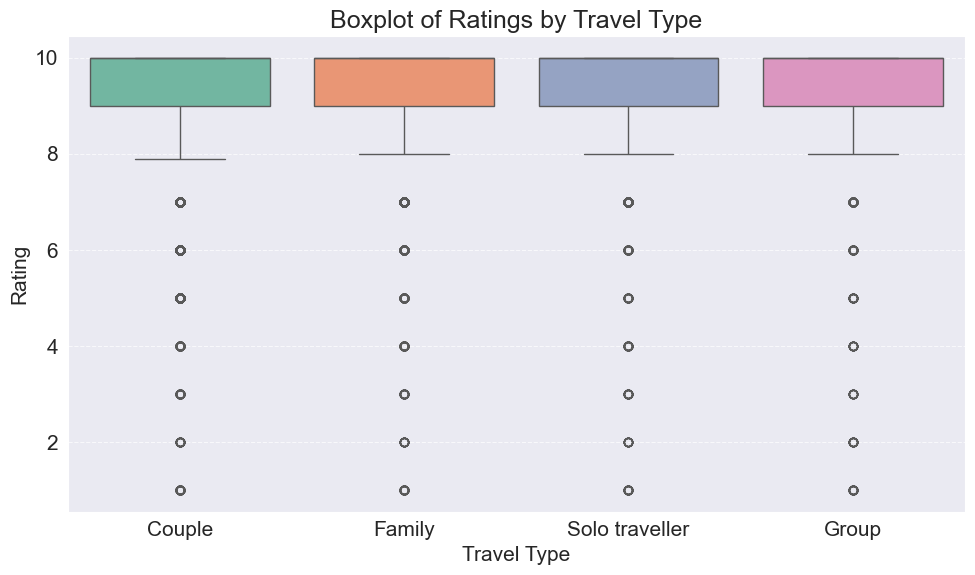

In [17]:
# ======================================================================== #
# Ratings by travel type
# ======================================================================== #
plt.figure(figsize=(10,6))
sns.boxplot(x='stay_type', y='rating', data=hotels, palette='Set2')

plt.title("Boxplot of Ratings by Travel Type")
plt.xlabel("Travel Type")
plt.ylabel("Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

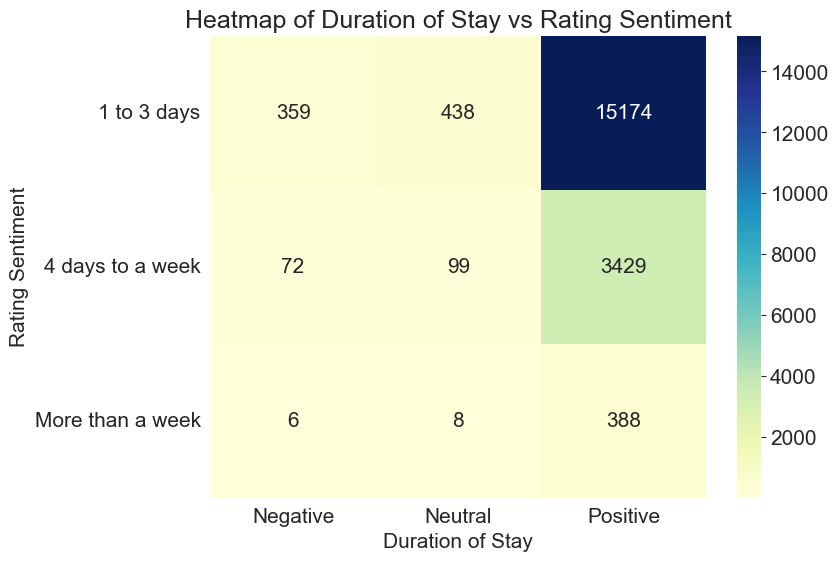

In [18]:
# ======================================================================== #
# Heatmap of duration of stay vs rating sentiment
# ======================================================================== #
hotels_copy = hotels.copy()
hotels_copy["stay_days"] = hotels_copy["stay_duration"].str.extract(r'(\d+)').astype(float)

# Categorize stay duration
def categorize_stay(days):
    if pd.isna(days):
        return "Unknown"
    elif days <= 3:
        return "1 to 3 days"
    elif 4 <= days <= 7:
        return "4 days to a week"
    else:
        return "More than a week"

hotels_copy["stay_category"] = hotels_copy["stay_days"].apply(categorize_stay)

if "rating_des" not in hotels_copy.columns:
    def categorize_rating(r):
        if r >= 7:
            return 'Positive'
        elif r <= 4:
            return 'Negative'
        else:
            return 'Neutral'
    hotels_copy['rating_des'] = hotels_copy['rating'].apply(categorize_rating)

heatmap_data = pd.crosstab(hotels_copy["stay_category"], hotels_copy["rating_des"])

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Duration of Stay vs Rating Sentiment")
plt.xlabel("Duration of Stay")
plt.ylabel("Rating Sentiment")
plt.show()

<span style='color:white; font-size:20px; font-weight:bold;'>3.4: Text-preprocessing</span>

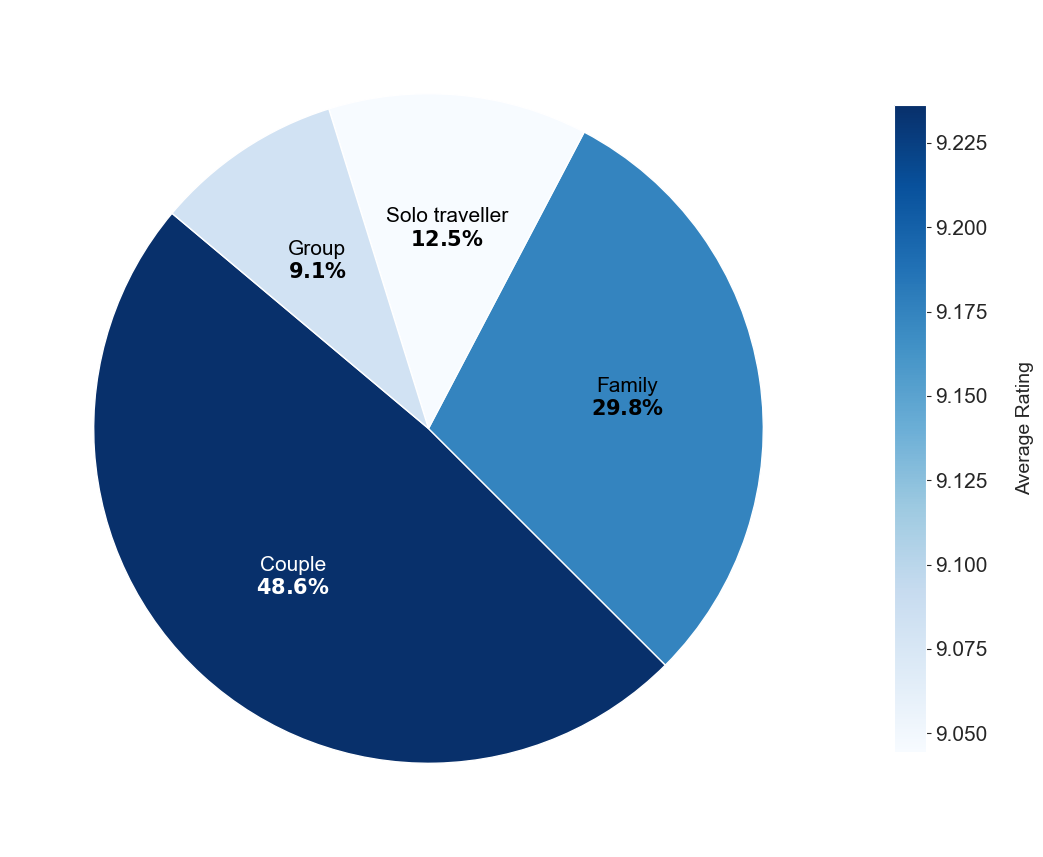

In [19]:
# ======================================================================== #
# Average ratings vs stay type
# ======================================================================== #
stay_counts = hotels['stay_type'].value_counts()
avg_ratings = hotels.groupby('stay_type')['rating'].mean()
stay_types = stay_counts.index
sizes = stay_counts.values
ratings = avg_ratings[stay_types].values

# Normalize ratings for colormap
norm = plt.Normalize(ratings.min(), ratings.max())
cmap = plt.cm.Blues  
colors = cmap(norm(ratings))

labels = [
    f"{stay_types[i]}\n"
    f"$\\bf{{{sizes[i] / sizes.sum() * 100:.1f}\\%}}$"
    for i in range(len(stay_types))
]

# Plot pie chart
fig, ax = plt.subplots(figsize=(12, 12)) 
wedges, texts = ax.pie(sizes, labels=None, startangle=140, colors=colors)

for i, w in enumerate(wedges):
    ang = (w.theta2 - w.theta1)/2. + w.theta1
    x = np.cos(np.deg2rad(ang)) * 0.6
    y = np.sin(np.deg2rad(ang)) * 0.6
    color = "white" if stay_types[i].lower() == "couple" else "black"
    ax.text(x, y, labels[i], ha='center', va='center', fontsize=15, color=color)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.05, pad=0.05, shrink=0.7)
cbar.set_label('Average Rating', fontsize=14, labelpad=20)

plt.show()

<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>3.3.2: Text Pre-Processing</span>

In [20]:
# ======================================================================== #
# Text Pre-Processing
# ======================================================================== #
with open("stopwords.txt", "r", encoding="utf-8") as f:
    content = f.read()

STOPWORDS = {w.strip().lower() for w in content.split(",") if w.strip()}
EXTRA_STOP = {"s", "t", "m", "re", "ve", "ll", "d"}
STOPWORDS |= EXTRA_STOP


DetectorFactory.seed = 0
lemmatizer = WordNetLemmatizer()

def is_english(text: str) -> bool:
    try:
        return detect(str(text)) == "en"
    except LangDetectException:
        return False

def get_wordnet_pos(tag: str):
    if tag.startswith('J'):
        return wordnet.ADJ
    if tag.startswith('V'):
        return wordnet.VERB
    if tag.startswith('N'):
        return wordnet.NOUN
    if tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

def normalize_text(txt: str) -> str:
    txt = unicodedata.normalize("NFKC", str(txt)).lower()
    txt = contractions.fix(txt)                          
    txt = re.sub(r"\b(\w+)'s\b", r"\1", txt)             
    txt = re.sub(r"[-_]", " ", txt)                   
    txt = re.sub(r"[^a-z\s]", " ", txt)                 
    txt = re.sub(r"\s+", " ", txt).strip()
    return txt

def clean_text(text: str) -> str:
    text = normalize_text(text)
    if not text:
        return ""

    tokens = word_tokenize(text)                          # already simple a–z tokens
    tokens = [w for w in tokens if w not in STOPWORDS and len(w) > 1]

    if not tokens:
        return ""

    tags = pos_tag(tokens)
    lemmas = [lemmatizer.lemmatize(w, get_wordnet_pos(t)) for w, t in tags]
    return " ".join(lemmas)


hotels = hotels[hotels['full_review'].apply(is_english)].copy()
hotels['Clean_Review'] = hotels['full_review'].apply(clean_text)

In [21]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10970 entries, 0 to 19967
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hotel_name_cleaned      10970 non-null  object        
 1   hotel_rank_booking.com  10970 non-null  int64         
 2   user_country            10970 non-null  object        
 3   stay_duration           10970 non-null  object        
 4   stay_type               10970 non-null  object        
 5   review_post_date        10970 non-null  datetime64[ns]
 6   rating                  10970 non-null  float64       
 7   full_review             10970 non-null  object        
 8   rating_des              10970 non-null  object        
 9   year_month              10970 non-null  object        
 10  Clean_Review            10970 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.0+ MB


<span style="color:darkblue; font-size:30px; font-weight:bold; text-decoration:underline;">4.1: Sentiment Analysis</span>

<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.1.1: TextBlob</span>

In [22]:
# ======================================================================== #
# Sentiment Analysis - TextBlob
# ======================================================================== #
def get_subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text): 
    return TextBlob(text).sentiment.polarity

# Apply to dataset
hotels['subjectivity'] = hotels['Clean_Review'].apply(get_subjectivity)
hotels['polarity'] = hotels['Clean_Review'].apply(get_polarity)

# Classify polarity sentiment
def classify_polarity(p):
    if p > 0:
        return 'Positive'
    elif p == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Create sentiment columns
hotels['polarity_sentiment'] = hotels['polarity'].apply(lambda x: 1 if x > 0 else 0)
hotels['polarity_sentiment_des'] = hotels['polarity'].apply(classify_polarity)

# Scatter plot: Polarity vs Subjectivity
fig = px.scatter(hotels, 
                 x='polarity', 
                 y='subjectivity', 
                 color='polarity_sentiment_des',
                 size='subjectivity',
                 title='Sentiment Analysis: Polarity vs Subjectivity',
                 labels={'polarity_sentiment_des': 'Sentiments'}
                 )

fig.update_layout(
    shapes=[dict(type='line', x0=0, x1=0, yref='paper', y0=0, y1=1)],
    xaxis_title="Polarity",
    yaxis_title="Subjectivity"
)

fig.show()

C:\Users\rebec\AppData\Local\Temp\ipykernel_20664\2398567983.py:11: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



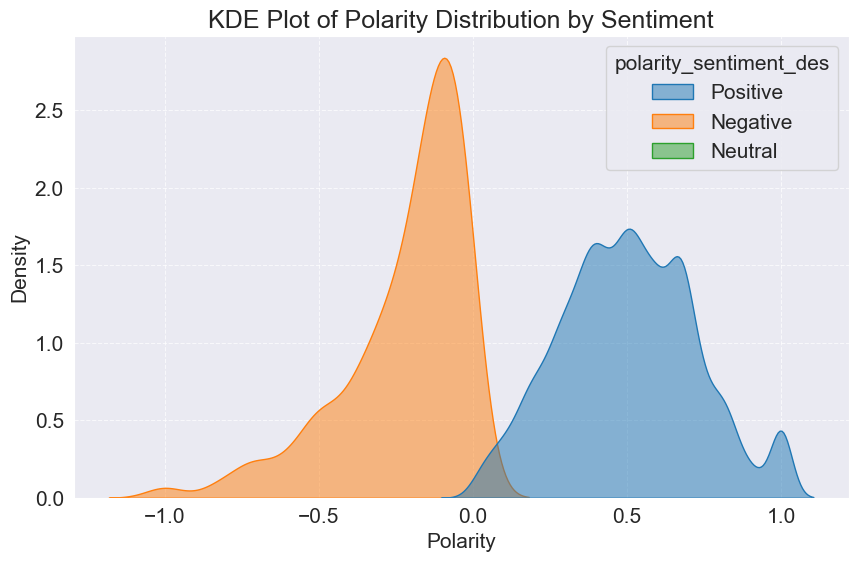

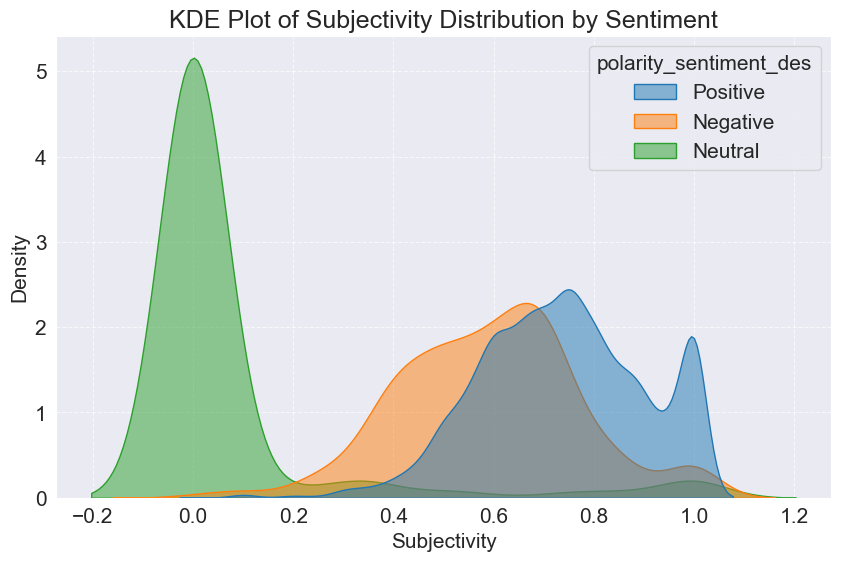

In [23]:
# ======================================================================== #
# KDE plot of polarity and subjectivity distribution by sentiment
# ======================================================================== #
hotels['polarity'] = pd.to_numeric(hotels['polarity'], errors='coerce')
hotels['subjectivity'] = pd.to_numeric(hotels['subjectivity'], errors='coerce')

clean_hotels = hotels.dropna(subset=['polarity', 'subjectivity', 'polarity_sentiment_des'])

# KDE Plot for Polarity Distribution
plt.figure(figsize=(10,6))
sns.kdeplot(data=clean_hotels, x="polarity", hue="polarity_sentiment_des",
            fill=True, common_norm=False, alpha=0.5)
plt.title("KDE Plot of Polarity Distribution by Sentiment")
plt.xlabel("Polarity")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# KDE Plot for Subjectivity Distribution
plt.figure(figsize=(10,6))
sns.kdeplot(data=clean_hotels, x="subjectivity", hue="polarity_sentiment_des",
            fill=True, common_norm=False, alpha=0.5)
plt.title("KDE Plot of Subjectivity Distribution by Sentiment")
plt.xlabel("Subjectivity")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

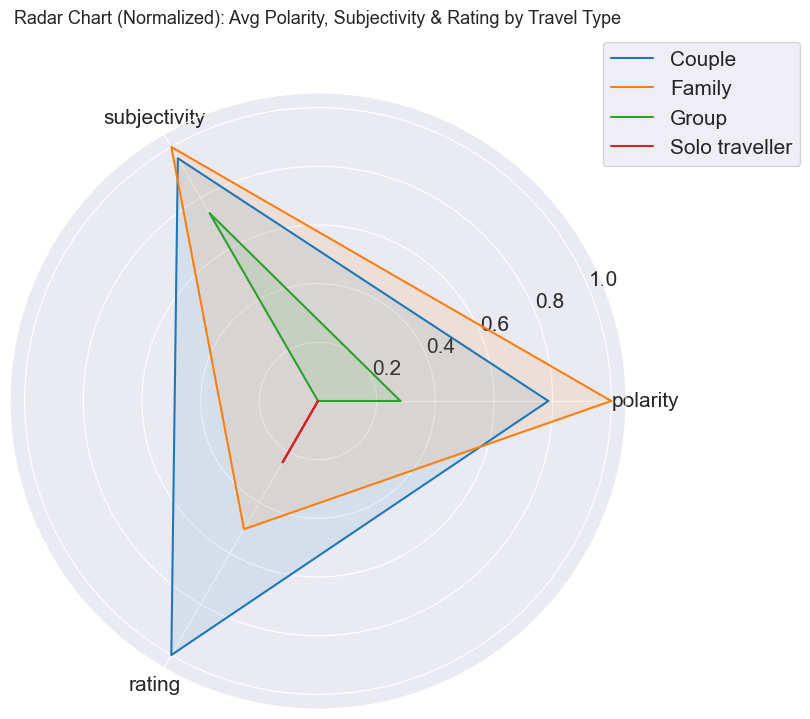

In [24]:
# ======================================================================== #
# Radar chart of average polarity, subjectivity, rating vs travel type
# ======================================================================== #
radar_data = hotels.groupby('stay_type')[['polarity', 'subjectivity', 'rating']].mean()
scaler = MinMaxScaler()
radar_scaled = pd.DataFrame(
    scaler.fit_transform(radar_data),
    index=radar_data.index,
    columns=radar_data.columns
)

categories = radar_scaled.columns.tolist()
travel_types = radar_scaled.index.tolist()
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  

# Plot Radar Chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for travel_type in travel_types:
    values = radar_scaled.loc[travel_type].tolist()
    values += values[:1]
    ax.plot(angles, values, label=travel_type)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title("Radar Chart (Normalized): Avg Polarity, Subjectivity & Rating by Travel Type", size=13, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

<span style='color:white; font-size:15px; font-weight:bold;'>4.1b: Vader Sentiment on Raw Review</span>

<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.1.1: VADER</span>

In [25]:
# ======================================================================== #
# Sentiment Analysis - VADER
# ======================================================================== #
sid = SentimentIntensityAnalyzer()

hotels['Sentiments'] = hotels['full_review'].apply(lambda x: sid.polarity_scores(x))
hotels = pd.concat([hotels.drop(['Sentiments'], axis=1), hotels['Sentiments'].apply(pd.Series)], axis=1)
hotels['vader_sentiment'] = hotels['compound'].apply(lambda x: 1 if x >= 0.05 else 0)

def classify_vader_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

hotels['vader_sentiment_des'] = hotels['compound'].apply(classify_vader_sentiment)

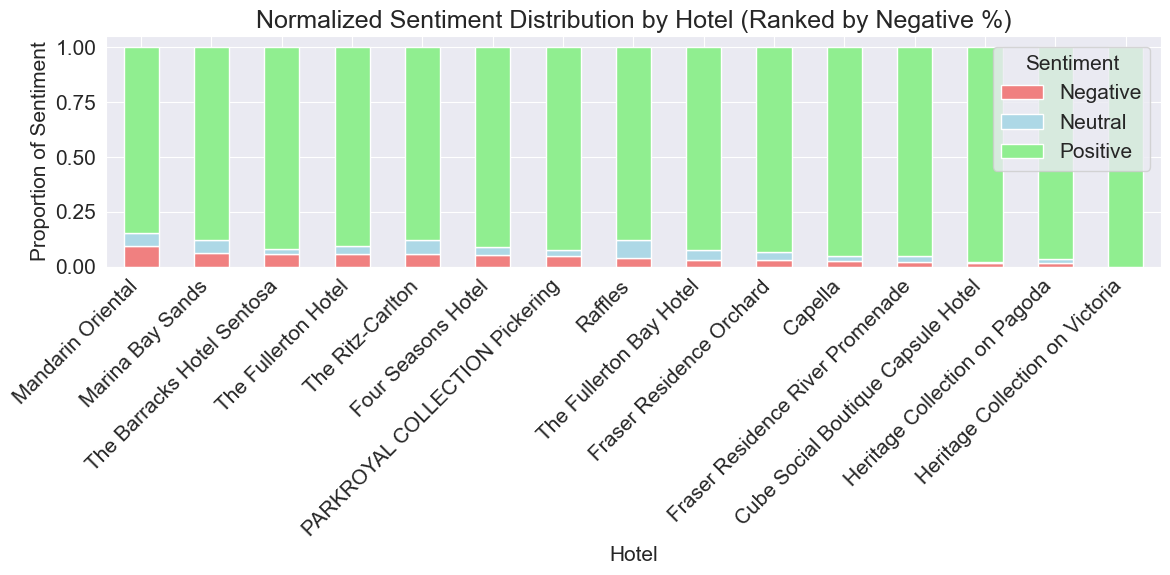

In [26]:
# ======================================================================== #
# Normalised sentiment distribution by hotels
# ======================================================================== #
sentiment_dist = pd.crosstab(hotels['hotel_name_cleaned'], hotels['vader_sentiment_des'], normalize='index')

# Ensure columns order: Negative, Neutral, Positive
for col in ['Negative', 'Neutral', 'Positive']:
    if col not in sentiment_dist.columns:
        sentiment_dist[col] = 0

sentiment_dist = sentiment_dist[['Negative', 'Neutral', 'Positive']]
sentiment_dist = sentiment_dist.sort_values(by='Negative', ascending=False)
ax = sentiment_dist.plot(kind='bar', stacked=True, figsize=(12, 6),
                         color=['lightcoral', 'lightblue', 'lightgreen'])

# Plot
plt.title("Normalized Sentiment Distribution by Hotel (Ranked by Negative %)")
plt.xlabel("Hotel")
plt.ylabel("Proportion of Sentiment")
plt.xticks(rotation=45, ha='right') 
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

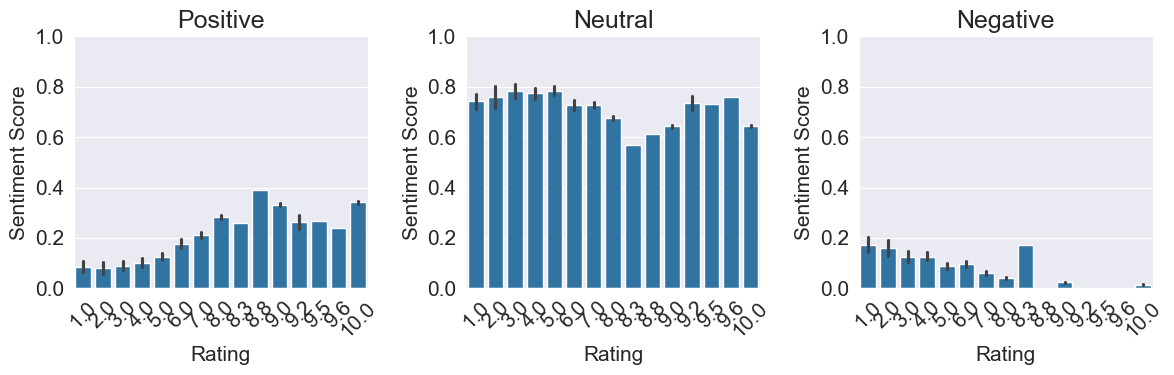

In [27]:
# ======================================================================== #
# Bar graph of sentiment scores with confidence intervals
# ======================================================================== #
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.barplot(data=hotels, x='rating', y='pos', ax=axs[0])
sns.barplot(data=hotels, x='rating', y='neu', ax=axs[1])
sns.barplot(data=hotels, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')


y_min = min(hotels[['pos','neu','neg']].min())
y_max = max(hotels[['pos','neu','neg']].max())
for ax in axs:
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Rating")
    ax.set_ylabel("Sentiment Score")
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.1.3: Comparison of TextBlob and VADER</span>

Pearson Correlation: 0.3698358386061788


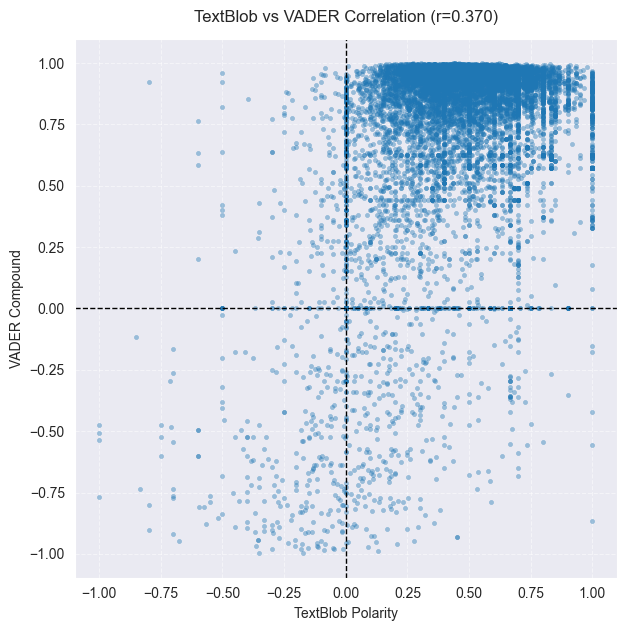

In [28]:
# ======================================================================== #
# Pearson Correlation
# ======================================================================== #
corr, _ = pearsonr(hotels['polarity'], hotels['compound'])
print("Pearson Correlation:", corr)

# Plot with seaborn
plt.figure(figsize=(7,7))
sns.scatterplot(
    data=hotels, 
    x='polarity', 
    y='compound',
    alpha=0.4,      
    s=10,           
    edgecolor=None
)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("TextBlob Polarity", fontsize=10)
plt.ylabel("VADER Compound", fontsize=10)
plt.title(f"TextBlob vs VADER Correlation (r={corr:.3f})", fontsize=12, pad=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


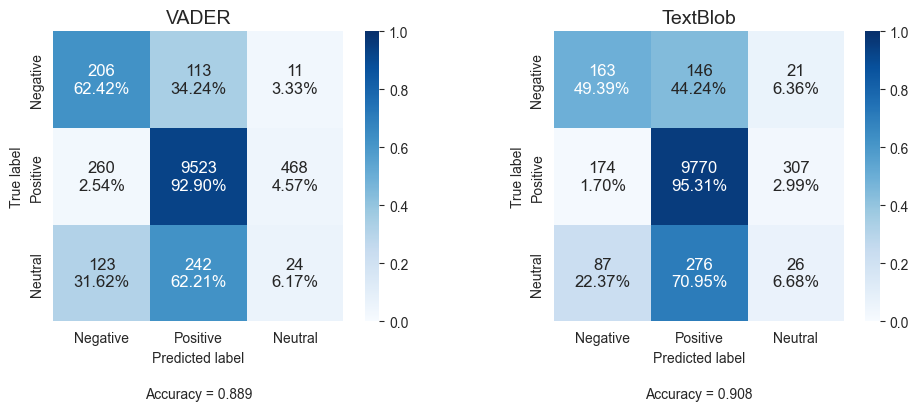

VADER Classification Report:
               precision    recall  f1-score   support

    Negative       0.35      0.62      0.45       330
    Positive       0.96      0.93      0.95     10251
     Neutral       0.05      0.06      0.05       389

    accuracy                           0.89     10970
   macro avg       0.45      0.54      0.48     10970
weighted avg       0.91      0.89      0.90     10970

TextBlob Classification Report:
               precision    recall  f1-score   support

    Negative       0.38      0.49      0.43       330
    Positive       0.96      0.95      0.96     10251
     Neutral       0.07      0.07      0.07       389

    accuracy                           0.91     10970
   macro avg       0.47      0.50      0.49     10970
weighted avg       0.91      0.91      0.91     10970



In [29]:
# ======================================================================== #
# Confusion Matrices and Classification Report
# ======================================================================== #
classes = ['Negative', 'Positive', 'Neutral']

def plot_confmat(y_true, y_pred, classes, title, ax,
                 title_size=14, label_size=10, tick_size=10,
                 ann_size=12, acc_size=10, acc_yoffset=-0.25,
                 cbar_tick_size=10):

    cm_counts = confusion_matrix(y_true, y_pred, labels=classes)

    with np.errstate(invalid='ignore', divide='ignore'):
        cm_rowpct = cm_counts / cm_counts.sum(axis=1, keepdims=True)

    ann = np.empty_like(cm_counts, dtype=object)
    for i in range(cm_counts.shape[0]):
        for j in range(cm_counts.shape[1]):
            pct = cm_rowpct[i, j]
            if np.isnan(pct):
                ann[i, j] = f"{cm_counts[i, j]}\n—"
            else:
                ann[i, j] = f"{cm_counts[i, j]}\n{pct:,.2%}"

    hm = sns.heatmap(
        cm_rowpct,
        annot=ann,
        fmt='',
        cmap='Blues',
        cbar=True,
        vmin=0, vmax=1,
        square=True,
        linewidths=0,
        xticklabels=classes,
        yticklabels=classes,
        annot_kws={"size": ann_size},
        ax=ax
    )

    cbar = hm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=cbar_tick_size)

    ax.set_xlabel("Predicted label", fontsize=label_size)
    ax.set_ylabel("True label", fontsize=label_size)
    ax.set_title(title, fontsize=title_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.grid(False)

    acc = accuracy_score(y_true, y_pred)
    ax.text(
        0.5, acc_yoffset,
        f"Accuracy = {acc:.3f}",
        ha='center', va='center',
        transform=ax.transAxes, fontsize=acc_size
    )

fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_confmat(hotels['rating_des'], hotels['vader_sentiment_des'], classes, "VADER", axes[0])
plot_confmat(hotels['rating_des'], hotels['polarity_sentiment_des'], classes, "TextBlob", axes[1])
plt.show()

# --- Classification Reports ---
print("\033[1mVADER Classification Report:\033[0m\n",
      classification_report(
          hotels['rating_des'], hotels['vader_sentiment_des'],
          labels=classes, target_names=classes, zero_division=0
      ))

print("\033[1mTextBlob Classification Report:\033[0m\n",
      classification_report(
          hotels['rating_des'], hotels['polarity_sentiment_des'],
          labels=classes, target_names=classes, zero_division=0
      ))


<span style="color:darkblue; font-size:30px; font-weight:bold; text-decoration:underline;">4.2: Topic Modelling</span>

<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.2.1: Latent Dirichlet Allocation</span>

In [30]:
# ======================================================================== #
# LDA topic words and scores
# ======================================================================== #
VECT_PARAMS = dict(
    max_df=0.9,
    min_df=25,
    token_pattern=r'\w+|\$[\d\.]+|\S+'
)

def build_vectorizer(**overrides):
    params = {**VECT_PARAMS, **overrides}
    return CountVectorizer(**params)

def vectorize_texts(df, vectorizer=None, text_col="Clean_Review"):
    texts = df[text_col].astype(str)
    if vectorizer is None:
        vectorizer = build_vectorizer()
        X = vectorizer.fit_transform(texts)
    else:
        X = vectorizer.transform(texts)
    return X, vectorizer

# --------------------------------------------
# Distinctiveness-aware topic word scoring
# --------------------------------------------
def topic_top_words_distinct(
    model, X_counts, vectorizer, top_n=10,
    method="relevance",      
    lambda_=0.6,             
    frex_w=0.5,              
    enforce_unique=False     
):

    eps = 1e-12

    beta = model.components_.astype(float)
    beta = beta / beta.sum(axis=1, keepdims=True)
    beta = np.maximum(beta, eps)

    term_freq = np.asarray(X_counts.sum(axis=0)).ravel().astype(float)
    term_freq = np.maximum(term_freq, 1.0)
    p_v = term_freq / term_freq.sum()
    p_v = np.maximum(p_v, eps)

    # Scoring Matrix
    if method == "lift":
        scores = beta / p_v
    elif method == "exclusivity":
        denom = beta.sum(axis=0, keepdims=True)
        scores = beta / np.maximum(denom, eps)
    elif method == "frex":
        excl = beta / np.maximum(beta.sum(axis=0, keepdims=True), eps)

        def rank_desc(mat):
            order = np.argsort(-mat, axis=1)
            ranks = np.empty_like(order)
            for i in range(mat.shape[0]):
                ranks[i, order[i]] = np.arange(1, mat.shape[1] + 1)
            return ranks

        r_freq = rank_desc(beta)
        r_excl = rank_desc(excl)
        frex = 1.0 / ((frex_w / r_freq) + ((1.0 - frex_w) / r_excl))
        scores = frex
    else:  
        scores = lambda_ * np.log(beta) + (1.0 - lambda_) * np.log(beta / p_v)

    vocab = np.array(vectorizer.get_feature_names_out())
    K, V = scores.shape

    # Build topics
    if enforce_unique:
        triples = [(k, v, scores[k, v]) for k in range(K) for v in range(V)]
        triples.sort(key=lambda t: t[2], reverse=True)
        assigned = set()
        topic_lists = [[] for _ in range(K)]
        topic_scores = [[] for _ in range(K)]
        for k, v, s in triples:
            if len(topic_lists[k]) >= top_n:
                continue
            if v in assigned:
                continue
            topic_lists[k].append(v)
            topic_scores[k].append(s)
            assigned.add(v)
            if all(len(lst) >= top_n for lst in topic_lists):
                break
    else:
        order = np.argsort(scores, axis=1)[:, ::-1][:, :top_n]
        topic_lists = [order[k].tolist() for k in range(K)]
        topic_scores = [scores[k, order[k, :]].tolist() for k in range(K)]

    # Renumber topics
    topics_dict = {k + 1: vocab[idxs].tolist() for k, idxs in enumerate(topic_lists)}
    topic_cols = {}
    for k in range(K):
        topic_cols[f"Topic {k+1} words"] = topics_dict[k+1]
        topic_cols[f"Topic {k+1} scores"] = [f"{s:.3f}" for s in topic_scores[k]]
    topics_df = pd.DataFrame(topic_cols)

    return topics_dict, topics_df

# --------------------------------------------
# Fit LDA + topic table + per-doc distributions
# --------------------------------------------
def fit_lda_block(
    df, n_topics, top_n_words,
    vectorizer=None,
    text_col="Clean_Review",
    random_state=122,
    method="relevance", lambda_=0.6, frex_w=0.5, enforce_unique=False
):

    X, vec = vectorize_texts(df, vectorizer=vectorizer, text_col=text_col)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=random_state).fit(X)

    topics_dict, topics_df = topic_top_words_distinct(
        lda, X, vec, top_n=top_n_words,
        method=method, lambda_=lambda_, frex_w=frex_w, enforce_unique=enforce_unique
    )

    # Per-document topic probabilities + dominant topic & keywords
    doc_topic = lda.transform(X)  # [n_docs, K]
    K = lda.n_components
    dist_df = pd.DataFrame(
        doc_topic,
        columns=[f"Topic {i+1}" for i in range(K)],  
        index=df.index
    )
    dom_idx = np.argmax(doc_topic, axis=1)
    dist_df["dominant_topic_idx"] = dom_idx + 1  
    dist_df["dominant_topic"] = dom_idx + 1
    dist_df["dominant_topic_keywords"] = [
        ", ".join(topics_dict[i+1][:min(top_n_words, len(topics_dict[i+1]))]) for i in dom_idx
    ]

    return lda, X, vec, topics_df, topics_dict, dist_df

# --------------------------------------------
# Convenience wrappers
# --------------------------------------------
def run_by_sentiment(df, rating_value, n_topics=10, top_n_words=10,
                     shared_vectorizer=None, **score_kwargs):
    sub = df[df["rating_des"] == rating_value].copy()
    return fit_lda_block(
        sub, n_topics, top_n_words,
        vectorizer=shared_vectorizer,
        **score_kwargs
    )

def run_all_reviews(df, n_topics=10, top_n_words=10,
                    shared_vectorizer=None, **score_kwargs):
    return fit_lda_block(
        df.copy(), n_topics, top_n_words,
        vectorizer=shared_vectorizer,
        **score_kwargs
    )

# Shared vectorizer on ALL reviews 
shared_vec = build_vectorizer()
_ = shared_vec.fit_transform(hotels["Clean_Review"].astype(str))

# Positive reviews
pos_model, pos_X, pos_vect, pos_topics_df, pos_topics_dict, pos_dist_df = run_by_sentiment(
    hotels, rating_value="Positive",
    n_topics=10, top_n_words=10,
    shared_vectorizer=shared_vec,
    method="relevance", lambda_=0.6, enforce_unique=False
)
display(pos_topics_df)

# Negative reviews
neg_model, neg_X, neg_vect, neg_topics_df, neg_topics_dict, neg_dist_df = run_by_sentiment(
    hotels, rating_value="Negative",
    n_topics=10, top_n_words=10,
    shared_vectorizer=shared_vec,
    method="relevance", lambda_=0.6, enforce_unique=False
)
display(neg_topics_df)

# All reviews
all_model, all_X, all_vect, all_topics_df, all_topics_dict, all_dist_df = run_all_reviews(
    hotels,
    n_topics=10, top_n_words=10,
    shared_vectorizer=shared_vec,
    method="relevance", lambda_=0.6, enforce_unique=False
)
display(all_topics_df)


hotels = hotels.copy()
for col in all_dist_df.columns:
    hotels.loc[all_dist_df.index, col] = all_dist_df[col]

,Topic 1 words,Topic 1 scores,Topic 2 words,Topic 2 scores,Topic 3 words,Topic 3 scores,Topic 4 words,Topic 4 scores,Topic 5 words,Topic 5 scores,Topic 6 words,Topic 6 scores,Topic 7 words,Topic 7 scores,Topic 8 words,Topic 8 scores,Topic 9 words,Topic 9 scores,Topic 10 words,Topic 10 scores
0,walk,-1.106,pool,-1.502,room,-1.498,design,-0.717,bed,-1.017,upgrade,-1.287,location,-1.088,service,-0.883,pool,-0.956,breakfast,-1.172
1,close,-1.606,view,-1.552,time,-1.847,superb,-1.131,room,-1.160,book,-1.409,great,-1.239,experience,-1.356,amaze,-1.156,food,-1.477
2,mrt,-1.629,room,-1.632,late,-1.934,architecture,-1.545,nice,-1.250,check,-1.428,staff,-1.359,special,-1.610,exceptional,-1.176,excellent,-1.516
3,distance,-1.682,check,-1.645,day,-1.976,bit,-1.551,bathroom,-1.304,suite,-1.582,clean,-1.394,exceptional,-1.625,view,-1.245,good,-1.648
4,machine,-1.815,crowd,-1.769,check,-2.076,unique,-1.678,toilet,-1.365,room,-1.690,friendly,-1.533,customer,-1.757,amazing,-1.339,staff,-1.699
5,orchard,-1.819,long,-1.837,open,-2.105,cleanliness,-1.689,shower,-1.408,tower,-1.770,helpful,-1.573,expectation,-1.836,infinity,-1.598,club,-1.730
6,station,-1.856,garden,-1.838,night,-2.114,standard,-1.761,water,-1.494,mb,-1.896,super,-1.753,class,-1.878,staff,-1.711,buffet,-1.738
7,river,-1.865,busy,-1.861,early,-2.130,location,-1.804,comfortable,-1.559,upgraded,-1.953,comfortable,-1.903,staff,-1.936,perfect,-1.762,bar,-1.785
8,coffee,-1.894,beautiful,-1.985,bring,-2.203,totally,-1.851,pillow,-1.737,anniversary,-1.967,chinatown,-2.053,attention,-2.042,fantastic,-1.766,lounge,-1.849
9,apartment,-1.917,expensive,-2.016,leave,-2.214,star,-1.858,bidet,-1.877,staff,-2.018,room,-2.159,impeccable,-2.107,great,-1.864,drink,-1.927


,Topic 1 words,Topic 1 scores,Topic 2 words,Topic 2 scores,Topic 3 words,Topic 3 scores,Topic 4 words,Topic 4 scores,Topic 5 words,Topic 5 scores,Topic 6 words,Topic 6 scores,Topic 7 words,Topic 7 scores,Topic 8 words,Topic 8 scores,Topic 9 words,Topic 9 scores,Topic 10 words,Topic 10 scores
0,room,-1.470,late,-1.128,room,-1.217,staff,-1.721,room,-1.873,room,-1.559,location,-1.489,pool,-1.634,train,-1.663,restaurant,-1.761
1,expectation,-1.950,check,-1.301,book,-1.896,room,-1.850,taxi,-2.007,check,-1.677,room,-1.830,room,-1.834,team,-1.820,wait,-1.924
2,reception,-2.026,process,-1.374,smell,-2.030,service,-2.067,pay,-2.065,tell,-1.795,option,-2.049,bad,-1.930,car,-1.822,book,-2.044
3,noisy,-2.147,adult,-1.485,charge,-2.040,star,-2.096,night,-2.079,night,-1.932,staff,-2.071,work,-2.004,money,-2.005,check,-2.051
4,plan,-2.189,comfort,-1.529,door,-2.263,check,-2.135,terrace,-2.097,construction,-1.937,service,-2.077,nice,-2.109,pricey,-2.049,pool,-2.079
5,mind,-2.192,elevator,-1.595,breakfast,-2.305,proper,-2.222,basic,-2.150,staff,-2.097,good,-2.182,water,-2.156,shop,-2.050,room,-2.139
6,activity,-2.192,return,-1.756,view,-2.307,request,-2.249,bed,-2.158,noise,-2.164,reservation,-2.215,service,-2.157,block,-2.062,day,-2.145
7,dollar,-2.214,extend,-1.758,bed,-2.337,bad,-2.307,book,-2.187,ask,-2.200,quality,-2.288,star,-2.168,crowd,-2.114,checkout,-2.157
8,sad,-2.224,guest,-1.909,small,-2.371,cost,-2.340,hospitality,-2.212,digital,-2.303,season,-2.292,swim,-2.219,water,-2.172,area,-2.183
9,live,-2.270,central,-2.036,poor,-2.391,leave,-2.392,tower,-2.225,fine,-2.376,worth,-2.302,price,-2.234,mall,-2.196,food,-2.205


,Topic 1 words,Topic 1 scores,Topic 2 words,Topic 2 scores,Topic 3 words,Topic 3 scores,Topic 4 words,Topic 4 scores,Topic 5 words,Topic 5 scores,Topic 6 words,Topic 6 scores,Topic 7 words,Topic 7 scores,Topic 8 words,Topic 8 scores,Topic 9 words,Topic 9 scores,Topic 10 words,Topic 10 scores
0,walk,-1.110,beautiful,-1.417,room,-1.284,star,-1.284,bed,-1.192,check,-0.670,location,-0.993,service,-0.974,pool,-0.921,breakfast,-1.069
1,mrt,-1.662,pool,-1.504,smell,-1.615,bad,-1.468,room,-1.193,time,-1.470,great,-1.183,experience,-1.307,view,-1.144,food,-1.336
2,distance,-1.696,building,-1.655,open,-2.000,book,-1.572,shower,-1.313,room,-1.678,staff,-1.283,exceptional,-1.595,amaze,-1.149,bar,-1.631
3,close,-1.719,view,-1.684,light,-2.022,charge,-1.815,toilet,-1.464,late,-1.736,clean,-1.419,special,-1.619,exceptional,-1.222,restaurant,-1.679
4,station,-1.796,room,-1.686,tea,-2.024,expect,-1.826,nice,-1.483,ready,-1.820,friendly,-1.489,expectation,-1.804,amazing,-1.329,buffet,-1.680
5,machine,-1.873,crowd,-1.690,cake,-2.043,reservation,-1.851,bathroom,-1.507,early,-1.851,helpful,-1.525,class,-1.932,infinity,-1.534,drink,-1.683
6,orchard,-1.887,lobby,-1.763,day,-2.138,service,-1.851,water,-1.542,flight,-1.946,super,-1.800,staff,-1.971,staff,-1.719,good,-1.688
7,shop,-1.946,garden,-1.837,afternoon,-2.176,room,-1.877,price,-1.751,tower,-1.950,comfortable,-1.822,customer,-2.019,perfect,-1.795,excellent,-1.843
8,coffee,-1.971,busy,-1.882,birthday,-2.187,issue,-1.883,good,-1.854,process,-1.961,good,-1.929,luxury,-2.035,fantastic,-1.805,option,-1.921
9,river,-1.979,area,-1.892,bring,-2.190,pay,-1.950,high,-1.950,noise,-1.995,excellent,-2.086,attention,-2.053,great,-1.852,staff,-1.931


In [31]:
# ======================================================================== #
# Topic words for all reviews
# ======================================================================== #
topic_words_output = {}
for topic_num, words in all_topics_dict.items():
    topic_words_output[f"Topic {topic_num}"] = ", ".join(words)

topic_words_output

{'Topic 1': 'walk, mrt, distance, close, station, machine, orchard, shop, coffee, river',
 'Topic 2': 'beautiful, pool, building, view, room, crowd, lobby, garden, busy, area',
 'Topic 3': 'room, smell, open, light, tea, cake, day, afternoon, birthday, bring',
 'Topic 4': 'star, bad, book, charge, expect, reservation, service, room, issue, pay',
 'Topic 5': 'bed, room, shower, toilet, nice, bathroom, water, price, good, high',
 'Topic 6': 'check, time, room, late, ready, early, flight, tower, process, noise',
 'Topic 7': 'location, great, staff, clean, friendly, helpful, super, comfortable, good, excellent',
 'Topic 8': 'service, experience, exceptional, special, expectation, class, staff, customer, luxury, attention',
 'Topic 9': 'pool, view, amaze, exceptional, amazing, infinity, staff, perfect, fantastic, great',
 'Topic 10': 'breakfast, food, bar, restaurant, buffet, drink, good, excellent, option, staff'}

In [32]:
# ======================================================================== #
# pyLDAvis of positive reviews
# ======================================================================== #
pos_vis = pyLDAvis.lda_model.prepare(pos_model, pos_X, pos_vect, mds='tsne')
pyLDAvis.display(pos_vis)

In [33]:
# ======================================================================== #
# pyLDAvis of negative reviews
# ======================================================================== #
neg_vis = pyLDAvis.lda_model.prepare(neg_model, neg_X, neg_vect, mds='tsne')
pyLDAvis.display(neg_vis)

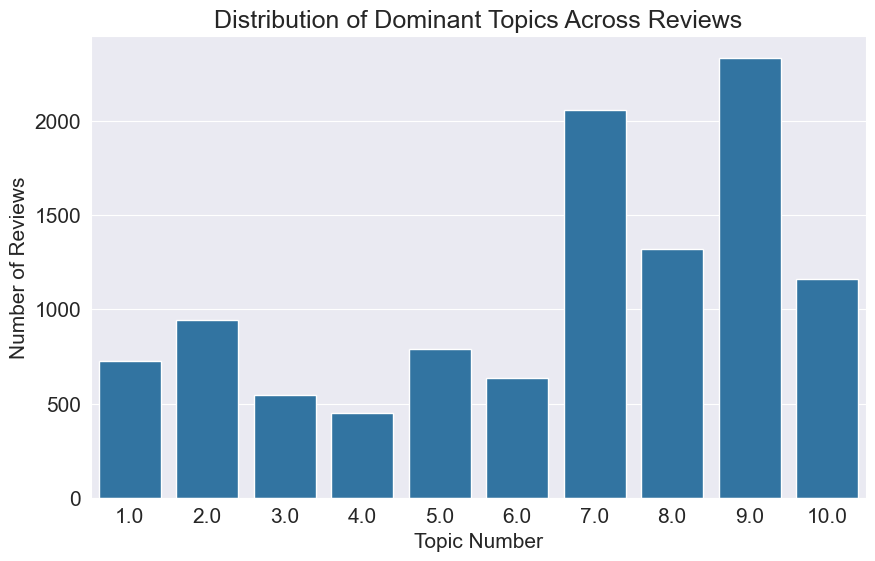

In [34]:
# ======================================================================== #
# Distribution of topics
# ======================================================================== #
plt.figure(figsize=(10, 6))
sns.countplot(x='dominant_topic', data=hotels)
plt.title('Distribution of Dominant Topics Across Reviews')
plt.xlabel('Topic Number')
plt.ylabel('Number of Reviews')
plt.show()

<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.2.2: n-grams</span>

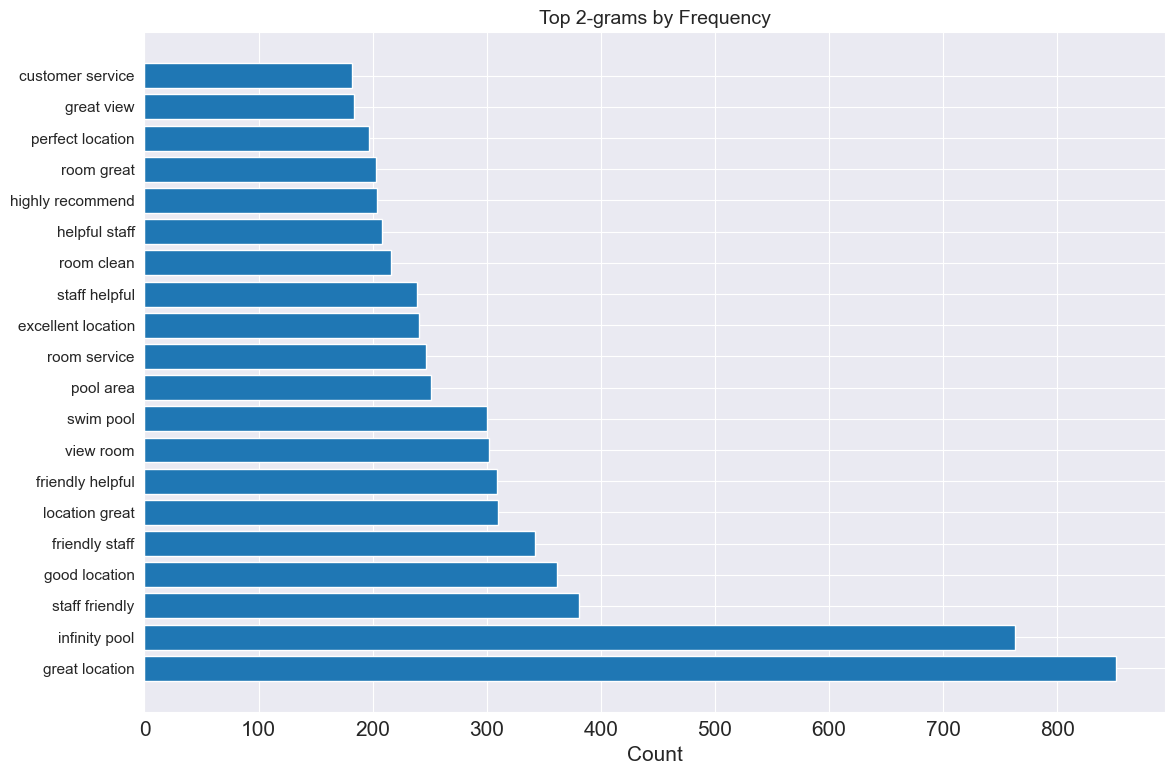

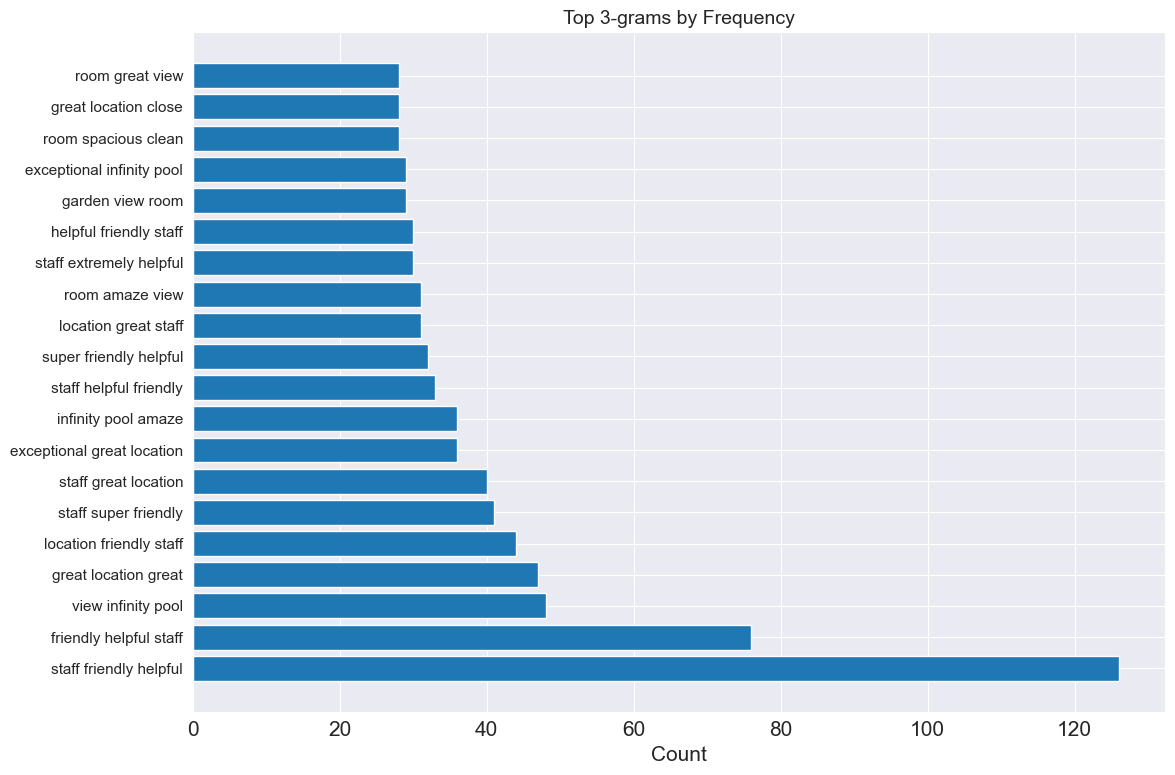

In [35]:
# ======================================================================== #
# Bi-grams and tri-grams
# ======================================================================== #
def plot_top_ngrams(
    df,
    text_col,
    ngram_range=(2, 2),
    top_k=20,
    min_df=10,
    max_df=0.9,
    token_pattern=r"\b[a-zA-Z]{3,}\b",
    title_prefix="Top"
):

    docs = (
        df[text_col]
        .dropna()
        .astype(str)
        .tolist()
    )
    if len(docs) == 0:
        print("No documents found to build n-grams.")
        return

    vect = CountVectorizer(
        ngram_range=ngram_range,
        stop_words="english",
        lowercase=True,
        strip_accents="unicode",
        token_pattern=token_pattern,
        max_df=max_df,
        min_df=min_df
    )
    X = vect.fit_transform(docs)  

    counts = np.asarray(X.sum(axis=0)).ravel()
    terms = np.array(vect.get_feature_names_out())

    order = counts.argsort()[::-1]
    top_terms = terms[order][:top_k]
    top_counts = counts[order][:top_k]

    plt.figure(figsize=(12, max(6, top_k * 0.4)))
    y_pos = np.arange(len(top_terms))[::-1]
    plt.barh(y_pos, top_counts[::-1])
    plt.yticks(y_pos, top_terms[::-1], fontsize=11)
    n_label = f"{ngram_range[0]}-gram" if ngram_range[0] == ngram_range[1] else f"{ngram_range[0]}–{ngram_range[1]}-gram"
    plt.title(f"{title_prefix} {n_label}s by Frequency", fontsize=14)
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()

# Bigrams
plot_top_ngrams(
    hotels,
    text_col="Clean_Review",
    ngram_range=(2, 2),
    top_k=20,
    min_df=10,     
    max_df=0.9     
)

# Trigrams
plot_top_ngrams(
    hotels,
    text_col="Clean_Review",
    ngram_range=(3, 3),
    top_k=20,
    min_df=10,
    max_df=0.9
)


<span style="color:darkblue; font-size:30px; font-weight:bold; text-decoration:underline;">4.3: Predictive Modelling</span>

In [36]:
# ======================================================================== #
# Label Encoding, Vectorisation, Train Test Split
# ======================================================================== #
hotels_binary = hotels[hotels['vader_sentiment_des'].isin(['Positive', 'Negative'])].copy()
X = hotels_binary['Clean_Review']
Y = hotels_binary['vader_sentiment_des']

vect = TfidfVectorizer()
X = vect.fit_transform(X)

labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Classes encoded as:", dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_))))


Classes encoded as: {'Negative': 0, 'Positive': 1}


In [37]:
# ======================================================================== #
# Class distribution
# ======================================================================== #

before_counts = Counter(y_train)
print("Before sampling class distribution:", {0: before_counts.get(0, 0), 1: before_counts.get(1, 0)})

ros = RandomOverSampler(random_state=42)
ros_X_train, ros_y_train = ros.fit_resample(x_train, y_train)

after_counts = Counter(ros_y_train)
print("After sampling class distribution:", {0: after_counts.get(0, 0), 1: after_counts.get(1, 0)})

Before sampling class distribution: {0: 474, 1: 7899}
After sampling class distribution: {0: 7899, 1: 7899}


<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.3.1: Logistic Regression</span>

In [38]:
# ======================================================================== #
# Logistic Regression
# ======================================================================== #

logistic_reg = LogisticRegression(random_state=0, max_iter=1000)
logistic_reg.fit(ros_X_train, ros_y_train)
logistic_reg_pred = logistic_reg.predict(x_test)

print("\033[1m=== Logistic Regression ===\033[0m")
accuracy = accuracy_score(y_test, logistic_reg_pred) * 100
print("Accuracy: \033[92m{:.2f}%\033[0m".format(accuracy))
print("Classification Report:\n", classification_report(y_test, logistic_reg_pred))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, logistic_reg_pred)


=== Logistic Regression ===
Accuracy: 91.17%
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.72      0.47       115
           1       0.98      0.92      0.95      1979

    accuracy                           0.91      2094
   macro avg       0.67      0.82      0.71      2094
weighted avg       0.95      0.91      0.93      2094



<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.3.2: Random Forest</span>

In [39]:
# ======================================================================== #
# Random Forest
# ======================================================================== #

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf.fit(ros_X_train, ros_y_train)
rf_pred = rf.predict(x_test)

print("\033[1m=== Random Forest ===\033[0m")
accuracy = accuracy_score(y_test, rf_pred) * 100
print("Accuracy: \033[92m{:.2f}%\033[0m".format(accuracy))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)


=== Random Forest ===
Accuracy: 95.22%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.21      0.32       115
           1       0.96      1.00      0.98      1979

    accuracy                           0.95      2094
   macro avg       0.84      0.60      0.65      2094
weighted avg       0.94      0.95      0.94      2094



<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.3.3: XGBoost</span>

In [40]:
# ======================================================================== #
# XGBoost
# ======================================================================== #

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb.fit(ros_X_train, ros_y_train)

xgb_pred = xgb.predict(x_test)

print("\033[1m=== XGBoost ===\033[0m")
accuracy = accuracy_score(y_test, xgb_pred) * 100
print("Accuracy: \033[92m{:.2f}%\033[0m".format(accuracy))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_pred)


C:\Users\rebec\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning:

[00:20:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




=== XGBoost ===
Accuracy: 92.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.62      0.46       115
           1       0.98      0.94      0.96      1979

    accuracy                           0.92      2094
   macro avg       0.67      0.78      0.71      2094
weighted avg       0.94      0.92      0.93      2094



<span style='color:red; font-size:25px; font-weight:bold; text-decoration:underline;'>4.3.4: Comparison of Predictive Models</span>

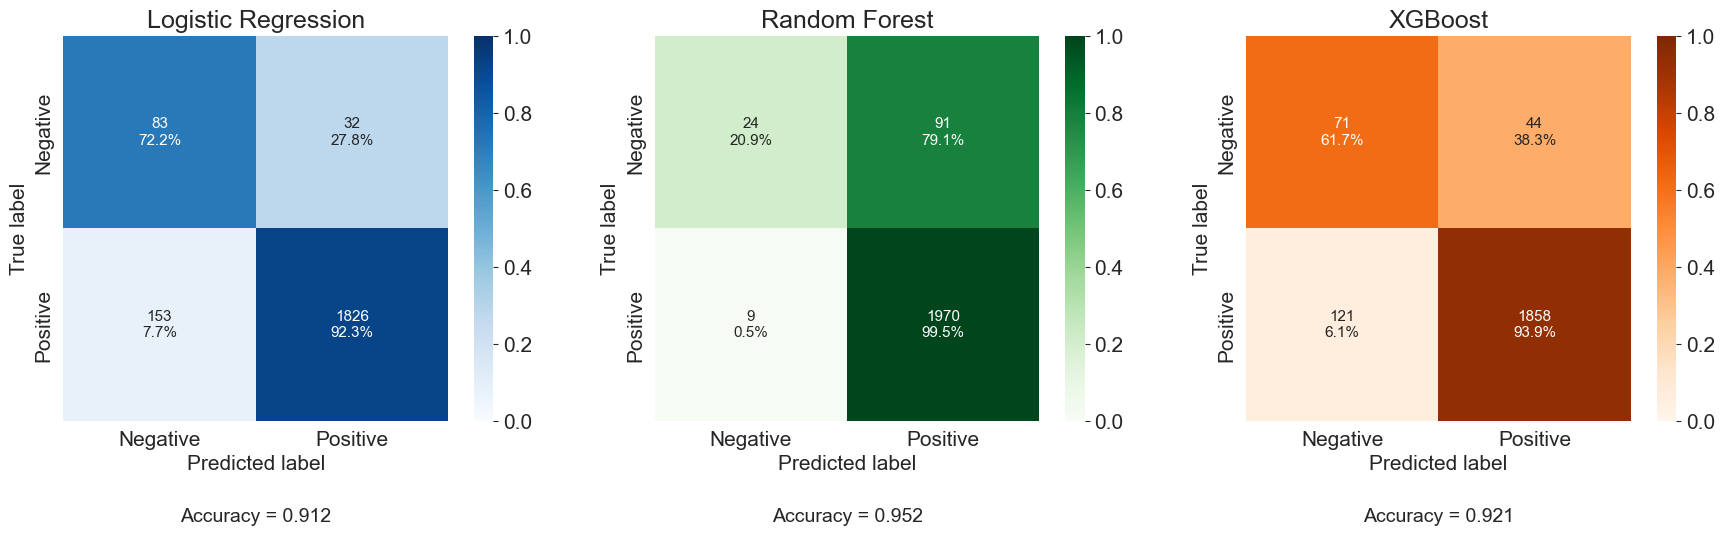

In [41]:
# ======================================================================== #
# Confusion Matrices
# ======================================================================== #
class_names = list(labelEncoder.classes_)  

def plot_confmat_with_acc(y_true, y_pred, classes=None, title="", ax=None,
                          ann_size=11, acc_size=14, acc_yoffset=-0.25, cmap="Blues"):
    labels = np.unique(y_true)

    ticklabels = classes if classes and len(classes) == len(labels) else [str(l) for l in labels]
    cm_counts = confusion_matrix(y_true, y_pred, labels=labels)
    row_sums = cm_counts.sum(axis=1, keepdims=True)
    with np.errstate(divide='ignore', invalid='ignore'):
        cm_rowpct = np.divide(cm_counts, row_sums, out=np.zeros_like(cm_counts, dtype=float), where=row_sums != 0)

    ann = np.empty_like(cm_counts).astype(str)
    for i in range(cm_counts.shape[0]):
        for j in range(cm_counts.shape[1]):
            count = cm_counts[i, j]
            pct = cm_rowpct[i, j]
            ann[i, j] = f"{count}\n{pct:.1%}" if row_sums[i, 0] != 0 else f"{count}\n—"

    # Plot Heatmap
    sns.heatmap(
        cm_rowpct,
        annot=ann, fmt='',
        cmap=cmap,
        cbar=True,
        vmin=0, vmax=1,
        square=True,
        linewidths=0,
        xticklabels=ticklabels,
        yticklabels=ticklabels,
        annot_kws={"size": ann_size},
        ax=ax
    )

    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_title(title)
    ax.grid(False)

    acc = accuracy_score(y_true, y_pred)
    ax.text(
        0.5, acc_yoffset,
        f"Accuracy = {acc:.3f}",
        ha='center', va='center',
        transform=ax.transAxes, fontsize=acc_size
    )

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_confmat_with_acc(
    y_test, logistic_reg_pred,
    classes=class_names,
    title="Logistic Regression", ax=axes[0], cmap="Blues"
)

plot_confmat_with_acc(
    y_test, rf_pred,
    classes=class_names,
    title="Random Forest", ax=axes[1], cmap="Greens"
)

plot_confmat_with_acc(
    y_test, xgb_pred,
    classes=class_names,
    title="XGBoost", ax=axes[2], cmap="Oranges"
)

plt.tight_layout()
plt.show()


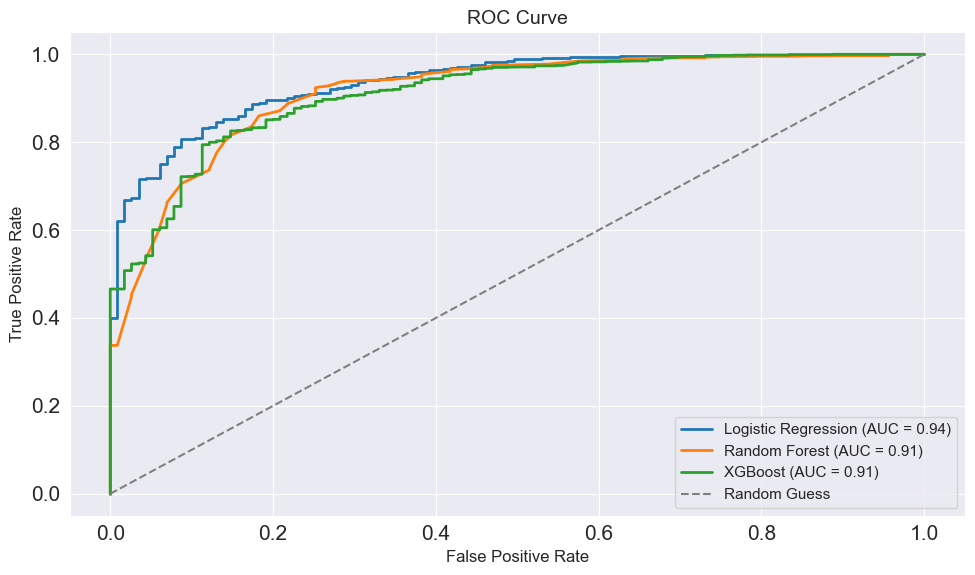

In [42]:
# ======================================================================== #
# ROC-AUC curve
# ======================================================================== #
logistic_reg_probs = logistic_reg.predict_proba(x_test)[:, 1]
rf_probs = rf.predict_proba(x_test)[:, 1]
xgb_probs = xgb.predict_proba(x_test)[:, 1]


# Compute FPR, TPR and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_reg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC-AUC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()


<span style="color:darkblue; font-size:30px; font-weight:bold; text-decoration:underline;">5: Model Deployment - Interactive Dashboard</span>

In [45]:
dashboard = hotels.copy()

In [46]:
import gradio as gr
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud

# ---------------------------------
# Consistent, modern Plotly look
# ---------------------------------
pio.templates.default = "plotly_white"

# =====================================================
# Assumptions:
# - You already have a DataFrame named `dashboard` in memory.
# - Optional models (if available in memory, from Code 1):
#     xgb, vect, labelEncoder           (XGBoost sentiment pipeline)
#     all_model/lda_all, all_vect/vect_all  (LDA topic model + vectorizer for ALL reviews)
# - Optional topic words dict: all_topics_dict  (e.g., {0: ["word1",...], ...})
# =====================================================

# ---------- Optional globals (guarded lookups) ----------
_XGB_MODEL       = globals().get("xgb", None)
_TEXT_VECT       = globals().get("vect", None)
_LABEL_ENCODER   = globals().get("labelEncoder", None)

# Accept either Code-1 naming
_LDA_MODEL       = globals().get("lda_all")  or globals().get("all_model")  or None
_VECT_TOPICS     = globals().get("vect_all") or globals().get("all_vect")   or None
_ALL_TOPICS_DICT = globals().get("all_topics_dict", {})  # {topic_idx: [keywords...]}

# ------------------ Topic labels (10, mutually exclusive) ------------------
topic_labels = {
    0: "Location & Accessibility",
    1: "Hotel View",
    2: "Room Cleanliness & Comfort",
    3: "Booking & Payment",
    4: "Room Amenities",
    5: "Front Desk Administration",
    6: "Customer Service",
    7: "Premium Service & Personalized Experience",
    8: "Hotel Recreational Facilities",
    9: "Food and Beverage",
}

# ---------------------------------------------
# Derive/attach topic fields from Code 1 output
# ---------------------------------------------
def _infer_dom_topic_from_probs(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    prob_cols = [c for c in df.columns
                 if c.strip().lower().startswith("topic ")
                 and c.strip()[6:].isdigit()]  # "Topic 1", "Topic 2", ...
    if prob_cols and ("dominant_topic_idx" not in df.columns and "dominant_topic" not in df.columns):
        probs = df[prob_cols].copy()
        dom_idx = probs.values.argmax(axis=1)
        df["dominant_topic_idx"] = dom_idx
        df["dominant_topic"] = dom_idx + 1
    return df

def _attach_topic_keywords(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    if "dominant_topic_keywords" not in df.columns:
        if "dominant_topic_idx" in df.columns and _ALL_TOPICS_DICT:
            def _kw(i):
                try:
                    return ", ".join(_ALL_TOPICS_DICT.get(int(i), [])[:10])
                except Exception:
                    return ""
            df["dominant_topic_keywords"] = df["dominant_topic_idx"].apply(_kw)
        else:
            df["dominant_topic_keywords"] = ""
    return df

def _attach_topic_label(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    if ("topic_label" not in df.columns) or ("topics" not in df.columns):
        if "dominant_topic_idx" in df.columns:
            df["topic_label"] = df["dominant_topic_idx"].apply(
                lambda i: topic_labels.get(int(i), f"Topic {i}")
            )
        elif "dominant_topic" in df.columns:
            df["topic_label"] = pd.to_numeric(df["dominant_topic"], errors="coerce").apply(
                lambda n: topic_labels.get(int(n) - 1, f"Topic {n}")
            )
        else:
            df["topic_label"] = np.nan
        df["topics"] = df["topic_label"]
    return df

def ensure_topics_from_code1(df: pd.DataFrame) -> pd.DataFrame:
    df = _infer_dom_topic_from_probs(df)
    df = _attach_topic_keywords(df)
    df = _attach_topic_label(df)
    return df

# ------------------ Keep only needed columns ------------------
DESIRED_COLS = [
    "hotel_name_cleaned",
    "user_country",
    "country",
    "city",
    "stay_duration",
    "stay_type",
    "review_post_date",
    "year_month",
    "rating",
    "polarity_sentiment_des",
    "dominant_emotion",
    "topic_label",
    "dominant_topic_keywords",
]

RENAME_MAP = {
    "hotel_name_cleaned": "hotel",
    "review_post_date": "date",
    "polarity_sentiment_des": "sentiment",
    "dominant_emotion": "emotions",
    "topic_label": "topics",
    "user_country": "country of residence",
}

FINAL_ORDER = [
    "hotel",
    "country of residence",
    "country",
    "city",
    "stay_duration",
    "stay_type",
    "date",
    "year_month",
    "rating",
    "sentiment",
    "emotions",
    "topics",
    "dominant_topic_keywords",
]

def keep_only_needed_columns(df):
    df = df.rename(columns=lambda c: c.strip() if isinstance(c, str) else c)
    keep = [c for c in DESIRED_COLS if c in df.columns]
    out = df.loc[:, keep]
    out = out.rename(columns=RENAME_MAP)
    final_cols = [c for c in FINAL_ORDER if c in out.columns]
    return out.loc[:, final_cols]

# ---- Apply topic fixes BEFORE trimming columns ----
dashboard = ensure_topics_from_code1(dashboard)
dashboard = keep_only_needed_columns(dashboard)

# =====================================================
# Shared sizing/style
# =====================================================
CHART_H = 360
COMMON_MARGIN = dict(l=20, r=20, t=50, b=20)

def style_fig(fig: go.Figure, title: str):
    fig.update_layout(
        title=title,
        template="plotly_white",
        paper_bgcolor="rgba(0,0,0,0)",
        plot_bgcolor="rgba(0,0,0,0)",
        height=CHART_H,
        margin=COMMON_MARGIN,
        font=dict(family="Inter, Segoe UI, Roboto, Helvetica, Arial, sans-serif"),
        title_font=dict(size=16, family="Inter, Segoe UI, Roboto, Helvetica, Arial, sans-serif"),
        hoverlabel=dict(bgcolor="white", font_size=12),
    )
    return fig

def kpi_card_html(title: str, value: str) -> str:
    return f"""
    <div class="kpi-card">
        <div class="kpi-title">{title}</div>
        <div class="kpi-value">{value}</div>
    </div>
    """

def pill_html(title: str, value: str) -> str:
    return f"""
    <div class="pill">
      <div class="pill-title">{title}</div>
      <div class="pill-value">{value}</div>
    </div>
    """

def sentiment_pill(sent_label: str) -> str:
    c = (sent_label or "").strip().lower()
    color = "#10B981" if c == "positive" else "#3B82F6" if c == "neutral" else "#EF4444" if c == "negative" else "#374151"
    text = sent_label if sent_label else "—"
    return f"""
    <div class="pill" style="border-color:{color}">
      <div class="pill-title">Predicted Sentiment</div>
      <div class="pill-value" style="color:{color}">{text}</div>
    </div>
    """

def topics_badges_html(pairs):
    """
    pairs: list of (label, prob_float in [0,1])
    Render nice badges with tiny progress bars.
    """
    rows = []
    for label, p in pairs:
        pct = max(0, min(100, round(p * 100)))
        rows.append(f"""
          <div class="topic-row">
            <div class="topic-row-top">
              <span class="topic-name">{label}</span>
              <span class="topic-pct">{pct}%</span>
            </div>
            <div class="topic-bar"><div class="topic-fill" style="width:{pct}%;"></div></div>
          </div>
        """)
    inner = "\n".join(rows) if rows else "<div class='topic-row'>No topic model available.</div>"
    return f"""
    <div class="pill">
      <div class="pill-title">Predicted Topics</div>
      <div class="pill-value" style="font-weight:500">
        <div class="topic-rows">{inner}</div>
      </div>
    </div>
    """

def empty_note(title):
    fig = go.Figure()
    fig.add_annotation(text="No data for current filters.", showarrow=False, x=0.5, y=0.5, xref="paper", yref="paper")
    return style_fig(fig, title)

# =====================================================
# Charts
# =====================================================
def create_top_topics(filtered_df):
    """Review Topics — show ALL labeled topics, sorted DESC, highest at top."""
    if 'topics' not in filtered_df.columns:
        return empty_note("Review Topics")

    counts = filtered_df['topics'].dropna().astype(str).value_counts()

    # include zero-count topics to show all labels
    for lbl in topic_labels.values():
        if lbl not in counts.index:
            counts.loc[lbl] = 0

    # sort by count DESC & build category order (highest first)
    counts = counts.sort_values(ascending=False)
    cats_desc = counts.index.tolist()

    fig = go.Figure(go.Bar(
        x=counts.values.tolist(),
        y=cats_desc,
        orientation='h',
        marker_color='#6366F1',
        hovertemplate="<b>%{y}</b><br>Reviews: %{x}<extra></extra>"
    ))
    # Show highest at TOP by reversing category array
    fig.update_layout(
        yaxis=dict(categoryorder='array', categoryarray=cats_desc[::-1], title=None),
        xaxis_title="Number of Reviews"
    )
    return style_fig(fig, "Review Topics")

def create_sentiment_chart(filtered_df):
    if 'sentiment' not in filtered_df.columns or filtered_df.empty:
        return empty_note("Sentiment Classification")

    ser = filtered_df['sentiment'].astype(str).str.capitalize()
    order = ["Positive", "Neutral", "Negative"]
    # Positive = green, Neutral = blue, Negative = red
    colors = ["#10B981", "#3B82F6", "#EF4444"]
    values = [int((ser == lab).sum()) for lab in order]
    if sum(values) == 0:
        return empty_note("Sentiment Classification")

    fig = go.Figure(data=[go.Pie(
        labels=order, values=values, hole=0.6, marker_colors=colors
    )])
    fig.update_layout(
        annotations=[dict(text=f"{sum(values)} Reviews", x=0.5, y=0.5, font_size=15, showarrow=False)]
    )
    return style_fig(fig, "Sentiment Classification")

def create_sentiment_by_date(filtered_df):
    if 'date' not in filtered_df.columns or 'sentiment' not in filtered_df.columns:
        return empty_note("Sentiment Over Time")

    df2 = filtered_df.copy()
    df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
    df2 = df2.dropna(subset=['date'])
    if df2.empty:
        return empty_note("Sentiment Over Time")

    df2['year'] = df2['date'].dt.year.astype(int)
    df2['sent_lc'] = df2['sentiment'].astype(str).str.lower()

    years = sorted(df2['year'].unique().tolist())
    yearly_sentiment = pd.DataFrame(index=years)
    for s in ['positive', 'neutral', 'negative']:
        yearly_sentiment[s.capitalize()] = (
            df2[df2['sent_lc'] == s]
            .groupby('year').size()
            .reindex(years, fill_value=0)
        )

    fig = go.Figure()
    colors = {'Positive': '#10B981', 'Neutral': '#3B82F6', 'Negative': '#EF4444'}
    x_vals = list(map(str, yearly_sentiment.index))
    for s in ['Positive', 'Neutral', 'Negative']:
        fig.add_trace(go.Scatter(
            x=x_vals, y=yearly_sentiment[s], mode='lines+markers',
            name=s, line=dict(color=colors[s])
        ))
    fig.update_layout(xaxis=dict(type='category'), xaxis_title="Year", yaxis_title="Count")
    return style_fig(fig, "Sentiment Over Time")

def create_sentiment_by_topic(filtered_df):
    """Topic Sentiments — stacked HORIZONTAL bars; topics sorted by total count DESC, highest at top."""
    if 'topics' not in filtered_df.columns or 'sentiment' not in filtered_df.columns:
        return empty_note("Topic Sentiments")

    df2 = filtered_df.copy()
    df2['topics'] = df2['topics'].astype(str)
    df2['sentiment'] = df2['sentiment'].astype(str).str.capitalize()

    if df2.empty:
        return empty_note("Topic Sentiments")

    # include all labels to stabilize axis
    all_labels = list(topic_labels.values())
    base = df2.groupby(['topics', 'sentiment']).size().reset_index(name='reviews')

    # ensure each topic has entries for all sentiments
    full = []
    for t in all_labels:
        for s in ['Positive', 'Neutral', 'Negative']:
            val = base[(base['topics'] == t) & (base['sentiment'] == s)]['reviews']
            full.append((t, s, int(val.iloc[0]) if not val.empty else 0))
    pivot = pd.DataFrame(full, columns=['topics', 'sentiment', 'reviews'])

    # order topics by TOTAL count DESC
    totals_by_topic = pivot.groupby('topics')['reviews'].sum().sort_values(ascending=False)
    ordered_topics_desc = totals_by_topic.index.tolist()

    fig = go.Figure()
    colors = {'Positive': '#10B981', 'Neutral': '#3B82F6', 'Negative': '#EF4444'}
    for s in ['Positive', 'Neutral', 'Negative']:
        sub = pivot[pivot['sentiment'] == s]
        sub = sub.set_index('topics').loc[ordered_topics_desc].reset_index()
        fig.add_trace(go.Bar(
            y=sub['topics'], x=sub['reviews'], name=s,
            orientation='h', marker_color=colors[s],
            hovertemplate="<b>%{y}</b><br>Reviews: %{x}<extra></extra>"
        ))

    fig.update_layout(
        barmode='stack',
        xaxis_title="Number of Reviews",
        yaxis=dict(categoryorder='array', categoryarray=ordered_topics_desc[::-1], title=None)
    )
    return style_fig(fig, "Topic Sentiments")

def create_word_cloud(filtered_df):
    if 'dominant_topic_keywords' not in filtered_df.columns:
        return empty_note("Word Cloud")

    text = ' '.join(filtered_df['dominant_topic_keywords'].dropna().astype(str).tolist()).strip()
    if not text:
        return empty_note("Word Cloud")

    wc = WordCloud(width=1200, height=600, background_color='white',
                   colormap='viridis', max_words=120, collocations=False).generate(text)
    img = wc.to_array()
    fig = go.Figure(go.Image(z=img))
    fig.update_xaxes(visible=False, showgrid=False)
    fig.update_yaxes(visible=False, showgrid=False, scaleanchor="x")
    return style_fig(fig, "Word Cloud")

# ---------- Choropleth (ISO-3) ----------
try:
    import pycountry
except Exception:
    pycountry = None

_FIXUPS_TO_ISO3 = {
    "usa": "USA", "united states": "USA", "u.s.": "USA", "u.s.a.": "USA", "us": "USA",
    "uk": "GBR", "u.k.": "GBR", "united kingdom": "GBR", "england": "GBR", "scotland": "GBR",
    "south korea": "KOR", "north korea": "PRK", "russia": "RUS", "laos": "LAO",
    "vietnam": "VNM", "czech republic": "CZE", "uae": "ARE", "dubai": "ARE",
    "hong kong": "HKG", "macau": "MAC", "taiwan": "TWN", "ivory coast": "CIV",
    "republic of the congo": "COG", "democratic republic of the congo": "COD",
    "eswatini": "SWZ", "swaziland": "SWZ", "myanmar": "MMR", "burma": "MMR",
}

def _to_iso3(name: str):
    if not isinstance(name, str):
        return None
    n = name.strip()
    if not n:
        return None
    key = n.lower()
    if key in _FIXUPS_TO_ISO3:
        return _FIXUPS_TO_ISO3[key]
    if pycountry:
        try:
            return pycountry.countries.lookup(n).alpha_3
        except Exception:
            try:
                return pycountry.countries.search_fuzzy(n)[0].alpha_3
            except Exception:
                return None
    FALLBACK = {"canada": "CAN", "australia": "AUS", "new zealand": "NZL", "japan": "JPN",
                "china": "CHN", "india": "IND", "germany": "DEU", "france": "FRA",
                "spain": "ESP", "italy": "ITA"}
    return FALLBACK.get(key)

def _iso3_to_name(iso3: str):
    if not isinstance(iso3, str):
        return None
    if pycountry:
        try:
            return pycountry.countries.get(alpha_3=iso3).name
        except Exception:
            return iso3
    return iso3

def create_choropleth_residence_iso3(filtered_df):
    col = "country of residence"
    if col not in filtered_df.columns:
        return empty_note("Guest Residency Portfolio")

    df2 = filtered_df.copy()
    df2[col] = df2[col].astype(str).str.strip()
    df2["iso3"] = df2[col].apply(_to_iso3)
    df2 = df2.dropna(subset=["iso3"])

    counts = (
        df2["iso3"].value_counts()
        .rename_axis("iso3")
        .reset_index(name="reviews")
    )
    counts["country"] = counts["iso3"].apply(_iso3_to_name)

    if counts.empty:
        return empty_note("Guest Residency Portfolio")

    fig = px.choropleth(
        counts, locations="iso3", locationmode="ISO-3",
        color="reviews", hover_name="country", color_continuous_scale="Blues"
    )
    return style_fig(fig, "Guest Residency Portfolio")

# =====================================================
# Prediction helpers (integrate sentiment + topic)
# =====================================================
def _predict_sentiment_xgb(text: str) -> str:
    if not text or not isinstance(text, str):
        return "N/A"
    if _XGB_MODEL is None or _TEXT_VECT is None:
        return "Model not loaded"
    try:
        X = _TEXT_VECT.transform([text])
        y_pred = _XGB_MODEL.predict(X)
        if _LABEL_ENCODER is not None:
            try:
                return _LABEL_ENCODER.inverse_transform(y_pred)[0]
            except Exception:
                return str(y_pred[0])
        return str(y_pred[0])
    except Exception as e:
        return f"Error: {e}"

def _predict_topics_pairs(text: str, top_k=2):
    """
    Return a list of (label, prob) for the top_k topics, or [] if model missing.
    """
    if not text or not isinstance(text, str):
        return []
    if _LDA_MODEL is None or _VECT_TOPICS is None:
        return []
    try:
        X = _VECT_TOPICS.transform([text])
        probs = _LDA_MODEL.transform(X)[0]
        order = np.argsort(probs)[::-1][:top_k]
        return [(topic_labels.get(int(idx), f"Topic {idx}"), float(probs[idx])) for idx in order]
    except Exception:
        return []

def predict_review(text: str):
    sent = _predict_sentiment_xgb(text)
    pairs = _predict_topics_pairs(text, top_k=2)
    topics_html = topics_badges_html(pairs)
    return (
        sentiment_pill(str(sent)),
        topics_html,
    )

# =====================================================
# Filtering & Controller
# =====================================================
def filter_data(df, country, city, hotel):
    filtered_df = df.copy()
    if country != 'All Countries' and 'country' in filtered_df.columns:
        filtered_df = filtered_df[filtered_df['country'].astype(str).str.lower() == country.lower()]
    if city != 'All Cities' and 'city' in filtered_df.columns:
        filtered_df = filtered_df[filtered_df['city'].astype(str).str.lower() == city.lower()]
    if hotel != 'All Hotels' and 'hotel' in filtered_df.columns:
        filtered_df = filtered_df[filtered_df['hotel'].astype(str).str.lower() == hotel.lower()]
    return filtered_df

def update_dashboard(country, city, hotel):
    filtered_df = filter_data(dashboard, country, city, hotel)

    total_reviews = len(filtered_df)
    avg_rating = pd.to_numeric(filtered_df.get('rating', pd.Series(dtype=float)), errors='coerce').mean()
    total_html = kpi_card_html("Total Number of Reviews", f"{total_reviews:,.0f}")
    avg_html   = kpi_card_html("Average Rating", "N/A" if pd.isna(avg_rating) else f"{avg_rating:.2f}")

    review_topics_chart      = create_top_topics(filtered_df)
    topic_sentiments_chart   = create_sentiment_by_topic(filtered_df)
    sentiment_chart          = create_sentiment_chart(filtered_df)
    sentiment_over_time      = create_sentiment_by_date(filtered_df)
    word_cloud_chart         = create_word_cloud(filtered_df)
    choropleth_chart         = create_choropleth_residence_iso3(filtered_df)

    return (total_html, avg_html,
            review_topics_chart, topic_sentiments_chart,
            sentiment_chart, sentiment_over_time,
            word_cloud_chart, choropleth_chart)

# =====================================================
# App (organized sections per requirements)
# =====================================================
def create_dashboard_app():
    df = dashboard

    def choices_for(col, all_label):
        if col in df.columns:
            vals = df[col].dropna().astype(str).str.strip().str.capitalize().unique().tolist()
            return [all_label] + sorted(vals)
        else:
            return [all_label]

    countries = choices_for("country", "All Countries")
    cities    = choices_for("city", "All Cities")
    hotels    = choices_for("hotel", "All Hotels")

    app_css = """
    :root{
      --card-bg:#ffffff;
      --border:#e5e7eb;
      --muted:#6b7280;
      --accent:#1DA1F2;
      --shadow:0 6px 20px rgba(0,0,0,.06);
      --radius:16px;
    }
    .container {max-width: 1280px; margin: 0 auto;}
    .kpi-card{
      background:var(--card-bg); border:1px solid var(--border); border-radius:var(--radius);
      padding:18px; text-align:center; box-shadow:var(--shadow);
    }
    .kpi-title{font-weight:700;color:#111827;margin-bottom:6px;font-size:14px}
    .kpi-value{font-size:30px;font-weight:800;color:var(--accent)}
    .pill{
      background:var(--card-bg); border:1px solid var(--border); border-radius:12px;
      padding:12px 14px; box-shadow:var(--shadow);
    }
    .pill-title{font-weight:600;color:#374151;margin-bottom:4px;font-size:13px}
    .pill-value{font-size:18px;font-weight:700;color:#111827}
    .section-title{font-weight:800; font-size:18px; color:#111827; margin: 8px 0 2px}
    .topic-rows{display:flex; flex-direction:column; gap:8px; margin-top:4px}
    .topic-row-top{display:flex; justify-content:space-between; font-size:13px; color:#374151}
    .topic-bar{height:8px; width:100%; background:#f3f4f6; border-radius:9999px; overflow:hidden; margin-top:4px}
    .topic-fill{height:100%; background:#6366F1}
    """

    with gr.Blocks(title="Hotel Sentiment Analysis Dashboard", css=app_css) as app:
        gr.Markdown("<div class='container'><h1 style='margin:4px 0 0'>🏨 Hotel Sentiment Analysis</h1><div style='color:#6b7280;margin-bottom:8px'>Insights by country, city, hotel, topic & sentiment</div></div>")

        # Filters
        with gr.Row(elem_classes=["container"]):
            country_dropdown = gr.Dropdown(label="Country", choices=countries, value=countries[0])
            city_dropdown    = gr.Dropdown(label="City", choices=cities, value=cities[0])
            hotel_dropdown   = gr.Dropdown(label="Hotel", choices=hotels, value=hotels[0])

        # (Removed normalize toggle per request)

        with gr.Row(elem_classes=["container"]):
            filter_btn = gr.Button("Apply Filters", variant="primary")
            reset_btn  = gr.Button("Reset")

        with gr.Tabs():
            with gr.Tab("Overview"):
                # Key metrics
                gr.Markdown("<div class='container section-title'>Key Metrics</div>")
                with gr.Row(elem_classes=["container"]):
                    kpi_total = gr.HTML(kpi_card_html("Total Number of Reviews", "0"))
                    kpi_avg   = gr.HTML(kpi_card_html("Average Rating", "N/A"))

                # Topic Overview
                gr.Markdown("<div class='container section-title'>Topic Overview</div>")
                with gr.Row(elem_classes=["container"]):
                    with gr.Column():
                        review_topics_plot = gr.Plot(label="Review Topics (Descending)")
                    with gr.Column():
                        topic_sentiments_plot = gr.Plot(label="Topic Sentiments (Stacked, Horizontal)")

                # Sentiment Overview
                gr.Markdown("<div class='container section-title'>Sentiment Overview</div>")
                with gr.Row(elem_classes=["container"]):
                    with gr.Column():
                        sentiment_plot  = gr.Plot(label="Sentiment Classification")
                    with gr.Column():
                        sentiment_time_plot = gr.Plot(label="Sentiment Over Time")

                # Deep Dives
                gr.Markdown("<div class='container section-title'>Deep Dives</div>")
                with gr.Row(elem_classes=["container"]):
                    with gr.Column():
                        word_cloud_plot = gr.Plot(label="Word Cloud")
                    with gr.Column():
                        choropleth_plot = gr.Plot(label="Guest Residency Portfolio")

            with gr.Tab("Analyze Review"):
                gr.Markdown("<div class='container section-title'>Try a Review (Predict Sentiment & Topic)</div>")
                with gr.Row(elem_classes=["container"]):
                    review_box = gr.Textbox(
                        label="Enter a review",
                        placeholder="Type or paste a hotel review here…",
                        lines=3
                    )
                with gr.Row(elem_classes=["container"]):
                    analyze_btn = gr.Button("Analyze Review", variant="secondary")
                with gr.Row(elem_classes=["container"]):
                    pred_sentiment_html = gr.HTML(sentiment_pill("—"))
                    pred_topic_html     = gr.HTML(topics_badges_html([]))

        # Wire events
        filter_btn.click(
            fn=update_dashboard,
            inputs=[country_dropdown, city_dropdown, hotel_dropdown],
            outputs=[kpi_total, kpi_avg,
                     review_topics_plot, topic_sentiments_plot,
                     sentiment_plot, sentiment_time_plot,
                     word_cloud_plot, choropleth_plot],
        )

        def reset_filters():
            return countries[0], cities[0], hotels[0]

        reset_btn.click(
            fn=reset_filters,
            inputs=[],
            outputs=[country_dropdown, city_dropdown, hotel_dropdown],
        ).then(
            fn=update_dashboard,
            inputs=[country_dropdown, city_dropdown, hotel_dropdown],
            outputs=[kpi_total, kpi_avg,
                     review_topics_plot, topic_sentiments_plot,
                     sentiment_plot, sentiment_time_plot,
                     word_cloud_plot, choropleth_plot],
        )

        # Initial load
        app.load(
            fn=update_dashboard,
            inputs=[country_dropdown, city_dropdown, hotel_dropdown],
            outputs=[kpi_total, kpi_avg,
                     review_topics_plot, topic_sentiments_plot,
                     sentiment_plot, sentiment_time_plot,
                     word_cloud_plot, choropleth_plot],
        )

        # Analyze review action
        analyze_btn.click(
            fn=predict_review,
            inputs=[review_box],
            outputs=[pred_sentiment_html, pred_topic_html],
        )

    return app

# Run
if __name__ == "__main__":
    app = create_dashboard_app()
    app.launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
